#### Introduction

In [1]:
import pandas as pd
import numpy as np
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import chi2_contingency
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
import math
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from IPython.display import display, HTML
import matplotlib.ticker as ticker

c:\Users\Matias\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\Matias\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
zip_path = '../00_Data_Bases/Supermercado_onehot.zip' 
csv_filename = 'Supermercado_onehot.csv'

with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open(csv_filename) as f:
        df = pd.read_csv(f)

In [3]:
display(HTML(df.to_html(max_rows=5, max_cols=200, notebook=True)))

In [4]:
df = df.drop('department_id', axis=1)

In [5]:
column_names = ['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day', 
                'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered', 
                'max_order', 'order_number_group_21-40 order', 'order_number_group_41-60 order',
                'order_number_group_61-80 order', 'order_number_group_81-100 order', 
                'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday', 
                'day_Wednesday', 'order_time_list_Dawn', 'order_time_list_Morning', 
                'order_time_list_Night', 'department_babies', 'department_bakery', 
                'department_beverages', 'department_breakfast', 'department_bulk', 
                'department_canned goods', 'department_dairy eggs', 'department_deli', 
                'department_dry goods pasta', 'department_frozen', 'department_household', 
                'department_international', 'department_meat seafood', 'department_missing', 
                'department_other', 'department_pantry', 'department_personal care', 
                'department_pets', 'department_produce', 'department_snacks', 
                'product_name_asian foods', 'product_name_baby accessories', 
                'product_name_baby bath body care', 'product_name_baby food formula', 
                'product_name_bakery desserts', 'product_name_baking ingredients', 
                'product_name_baking supplies decor', 'product_name_beauty']

department_columns = [col for col in column_names if col.startswith('department')]

print(department_columns)

['department_babies', 'department_bakery', 'department_beverages', 'department_breakfast', 'department_bulk', 'department_canned goods', 'department_dairy eggs', 'department_deli', 'department_dry goods pasta', 'department_frozen', 'department_household', 'department_international', 'department_meat seafood', 'department_missing', 'department_other', 'department_pantry', 'department_personal care', 'department_pets', 'department_produce', 'department_snacks']


### Clustering - K-Means

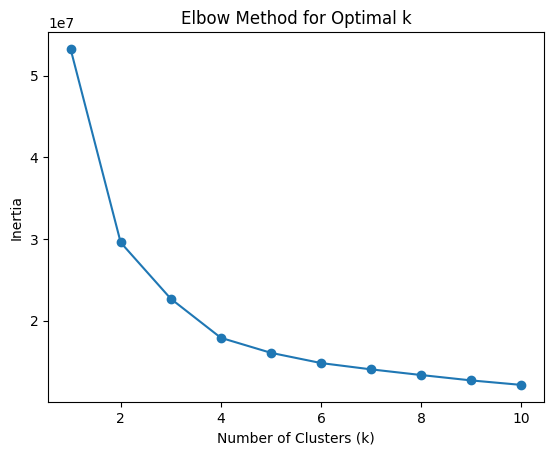

In [6]:
X = df[['department_babies', 'department_bakery', 'department_beverages', 'department_breakfast', 'department_bulk', 
        'department_canned goods', 'department_dairy eggs', 'department_deli', 
        'department_dry goods pasta', 'department_frozen', 'department_household', 
        'department_international', 'department_meat seafood', 'department_missing', 
        'department_other', 'department_pantry', 'department_personal care', 
        'department_pets', 'department_produce', 'department_snacks', 'max_order', 'order_hour_of_day', 'days_since_prior_order']]

inertia_values = []

for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

### Clustering - K-Means - n=2

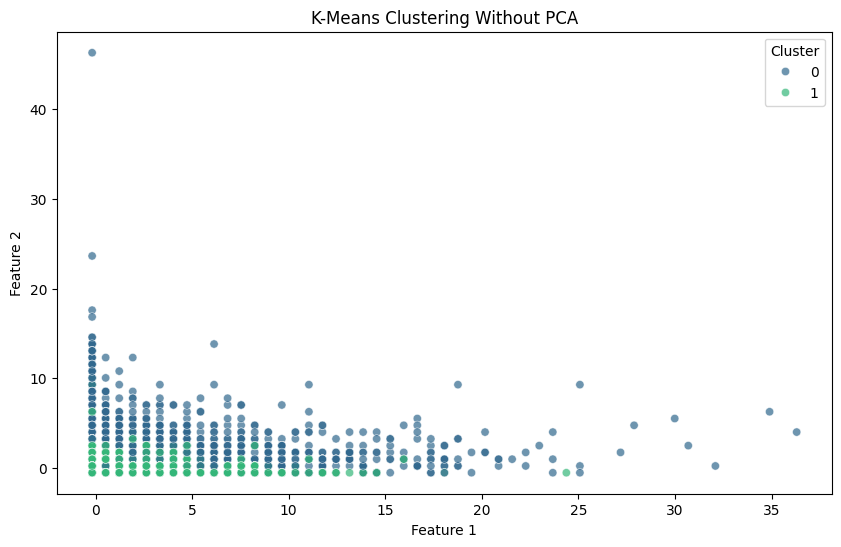

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_clusters = 2

kmeans2 = KMeans(n_clusters=n_clusters, random_state=100)
labels = kmeans2.fit_predict(X_scaled)

df_c2 = pd.DataFrame(X_scaled, columns=[f'Feature_{i+1}' for i in range(X.shape[1])])
df_c2['Cluster'] = labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Feature_1', y='Feature_2', hue='Cluster', data=df_c2, palette='viridis', alpha=0.7)
plt.title('K-Means Clustering Without PCA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()

In [8]:
df_l2 = df[['department_babies', 'department_bakery', 'department_beverages', 'department_breakfast', 'department_bulk', 
        'department_canned goods', 'department_dairy eggs', 'department_deli', 
        'department_dry goods pasta', 'department_frozen', 'department_household', 
        'department_international', 'department_meat seafood', 'department_missing', 
        'department_other', 'department_pantry', 'department_personal care', 
        'department_pets', 'department_produce', 'department_snacks', 'max_order', 'order_hour_of_day', 'days_since_prior_order']]

In [9]:
df_l2['Clusters_2'] = kmeans2.labels_

C:\Users\Matias\AppData\Local\Temp\ipykernel_27900\1870083769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_l2['Clusters_2'] = kmeans2.labels_


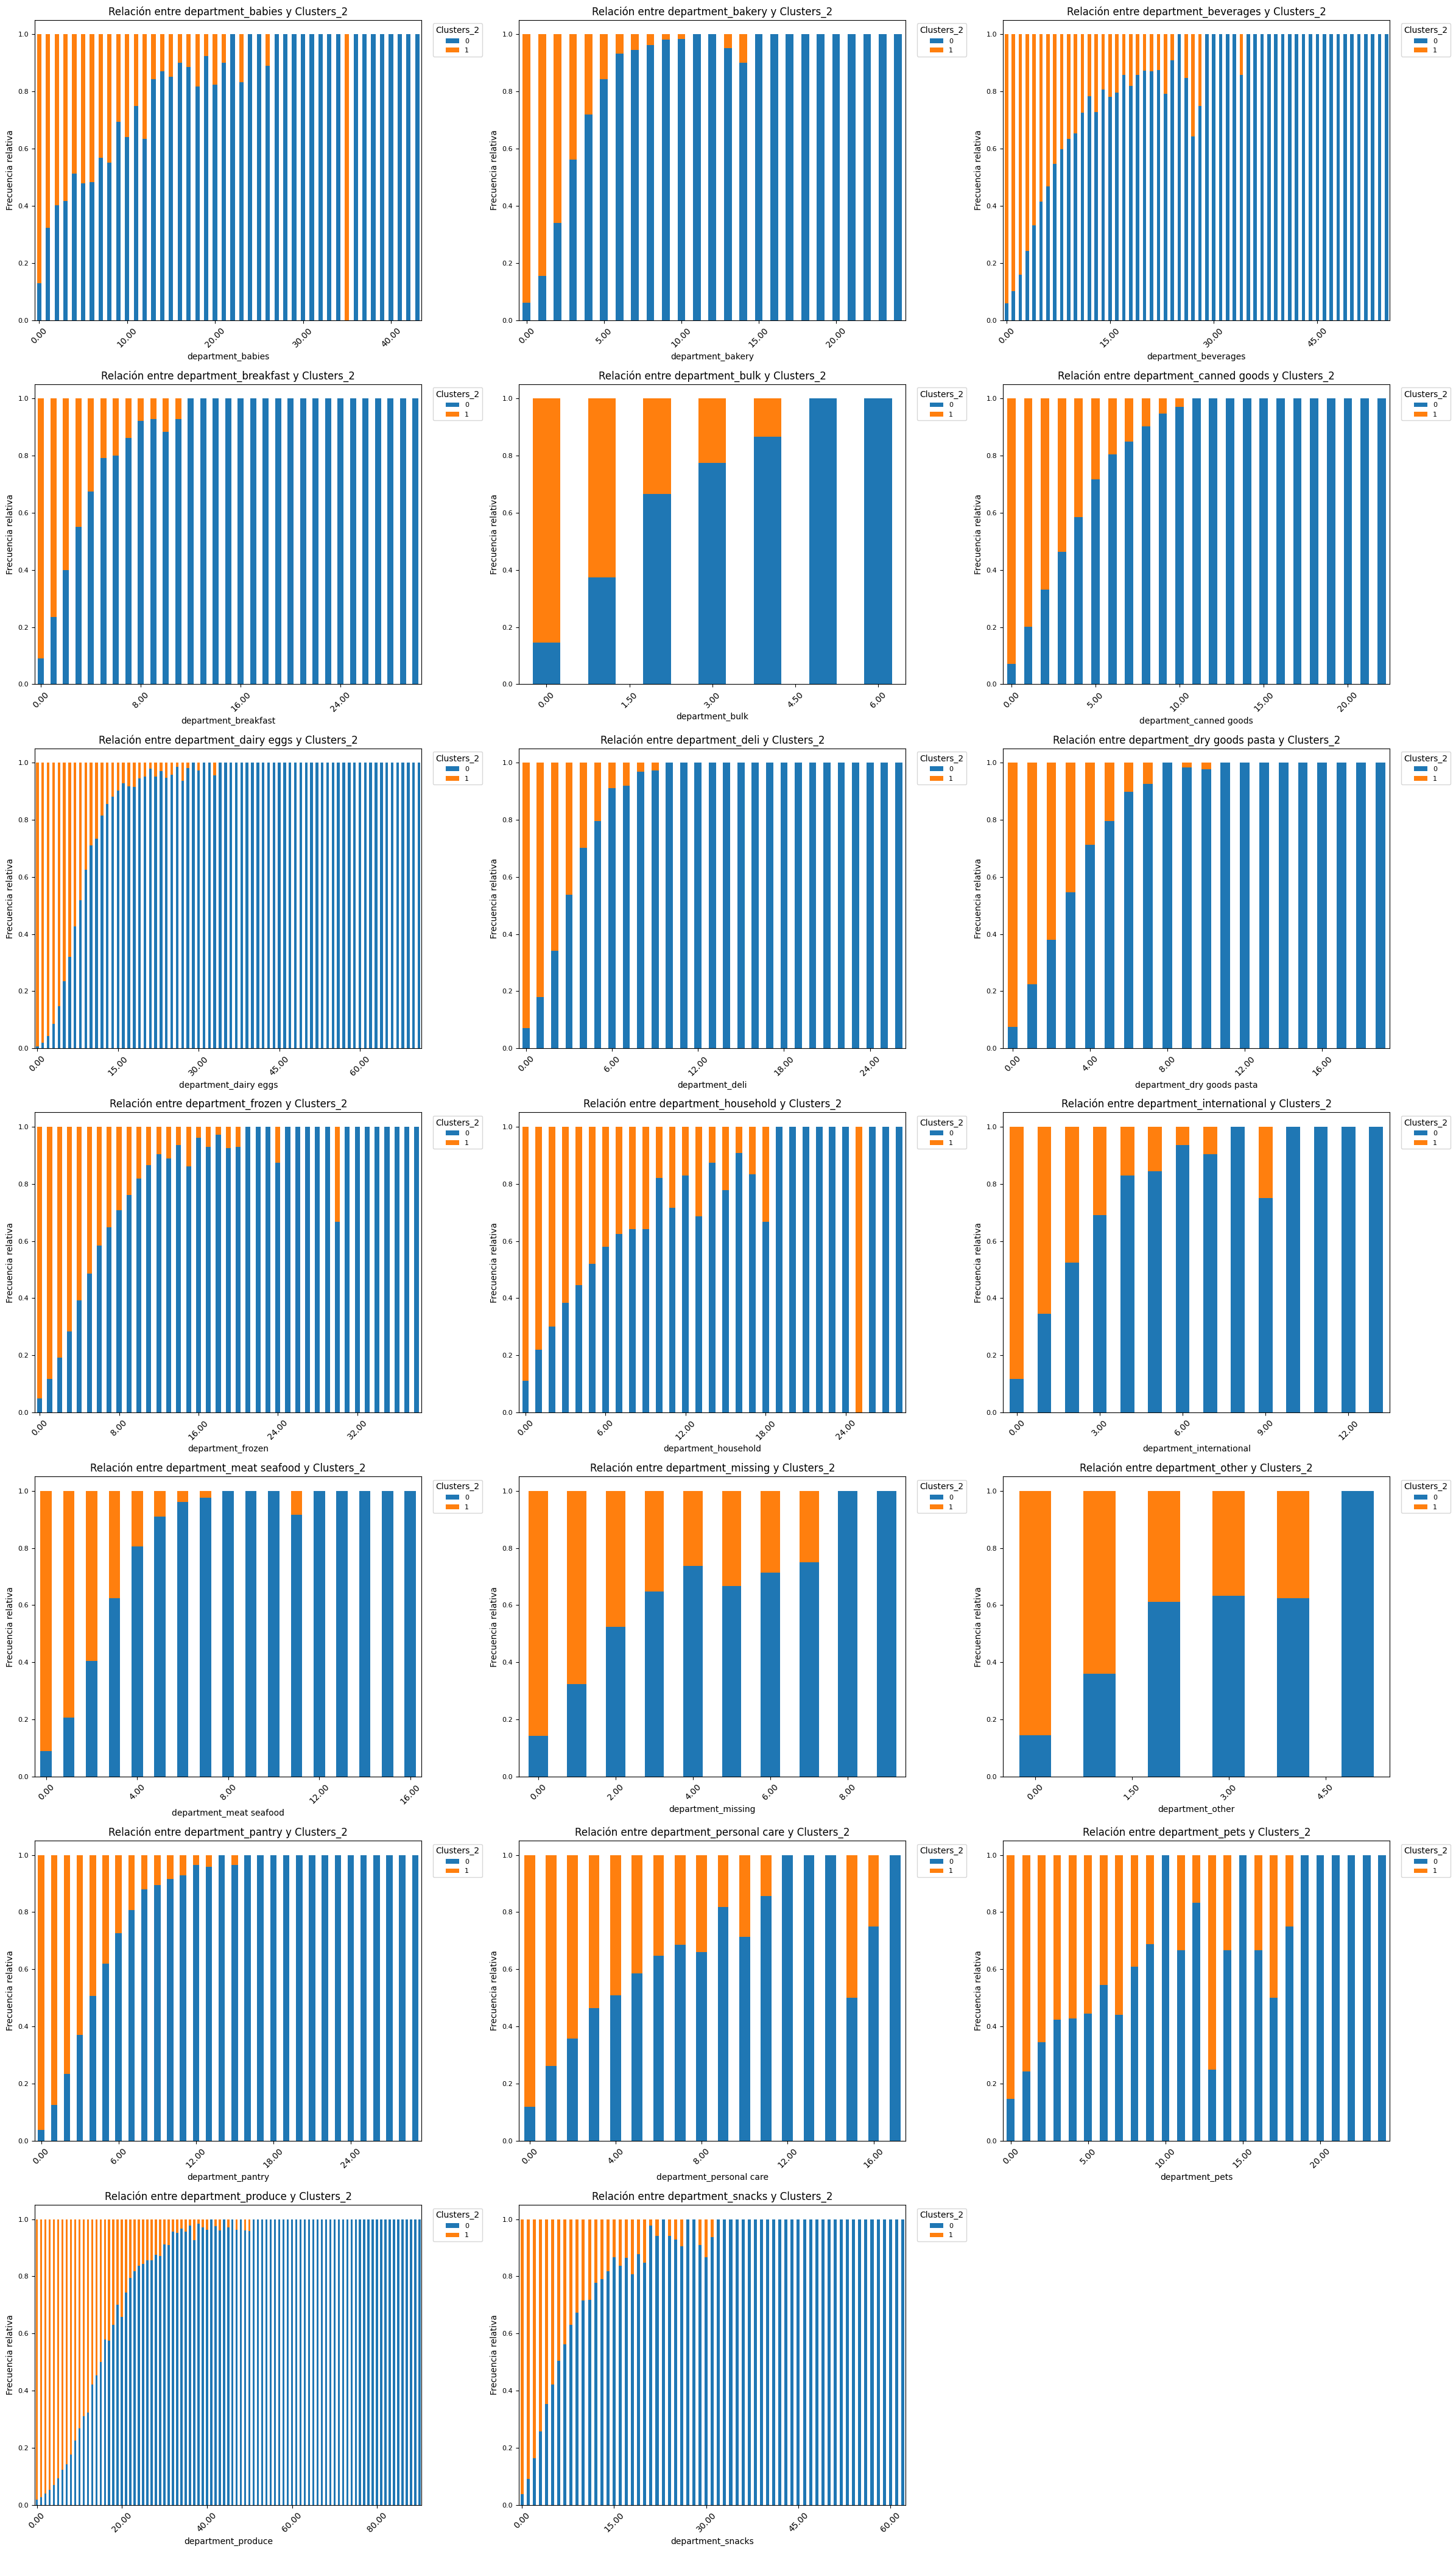

In [10]:
department_columns = [col for col in df_l2.columns if col.startswith('department')]

num_rows = 7
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 6 * num_rows))

for i, columna in enumerate(department_columns):
    if i >= num_rows * num_cols:
        break
    
    row = i // num_cols
    col = i % num_cols

    frecuencias = df_l2.groupby(columna)['Clusters_2'].value_counts(normalize=True).unstack()
    frecuencias.plot(kind='bar', stacked=True, ax=axs[row, col])
    
    axs[row, col].set_title(f'Relación entre {columna} y Clusters_2', fontsize=12)
    axs[row, col].set_xlabel(columna, fontsize=10)
    axs[row, col].set_ylabel('Frecuencia relativa', fontsize=10)
    axs[row, col].tick_params(axis='x', rotation=45, labelsize=10)
    axs[row, col].tick_params(axis='y', labelsize=8)

    axs[row, col].legend(title='Clusters_2', fontsize=8, bbox_to_anchor=(1.02, 1), loc='upper left')
    
    axs[row, col].xaxis.set_major_locator(ticker.MaxNLocator(5))
    axs[row, col].xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axs[j // num_cols, j % num_cols])

plt.tight_layout()
plt.show()


In [11]:
stats = df_l2.groupby('Clusters_2').agg(['mean', 'median'])

mode_df = df_l2.groupby('Clusters_2').agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
mode_df.columns = pd.MultiIndex.from_product([mode_df.columns, ['mode']])

stats = pd.concat([stats, mode_df], axis=1)

stats_formatted = stats.style.format("{:.2f}").set_caption("Estadísticas Descriptivas por Clúster").set_properties(**{
    'text-align': 'center'}).set_table_styles([{
    'selector': 'caption',
    'props': 'caption-side: top; font-size:16px; font-weight:bold; text-align:center;'
}])

stats_formatted

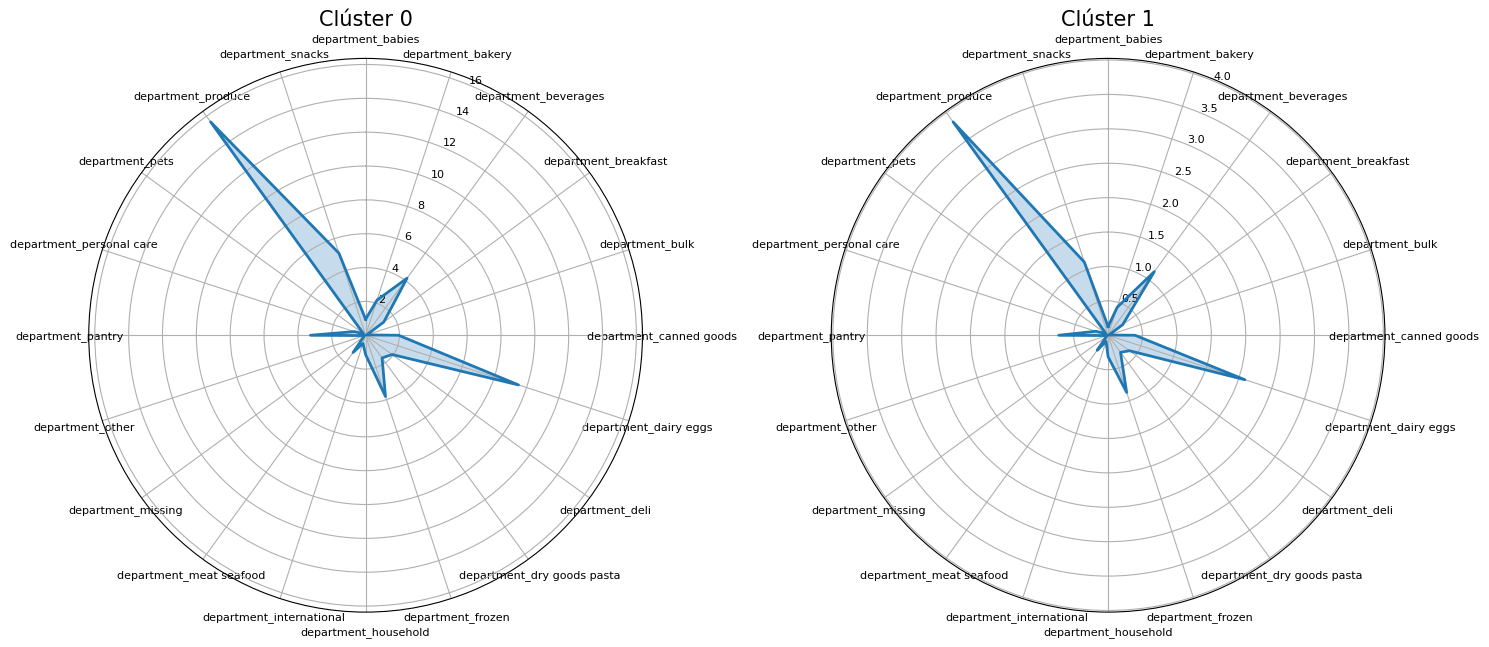

In [12]:
num_clusters = df_l2['Clusters_2'].nunique()
categories = department_columns

fig, axes = plt.subplots(1, num_clusters, subplot_kw={'polar': True}, figsize=(15, 7))

for i, cluster in enumerate(df_l2['Clusters_2'].unique()):
    values = df_l2[df_l2['Clusters_2'] == cluster][categories].mean().values.flatten().tolist()
    values += values[:1]  # Cerrar el gráfico de radar
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]
    
    ax = axes[i] if num_clusters > 1 else axes
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    ax.plot(angles, values, linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha=0.25)
    ax.set_title(f'Clúster {cluster}', size=15)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=8)
    ax.tick_params(axis='y', labelsize=8)

plt.tight_layout()
plt.show()

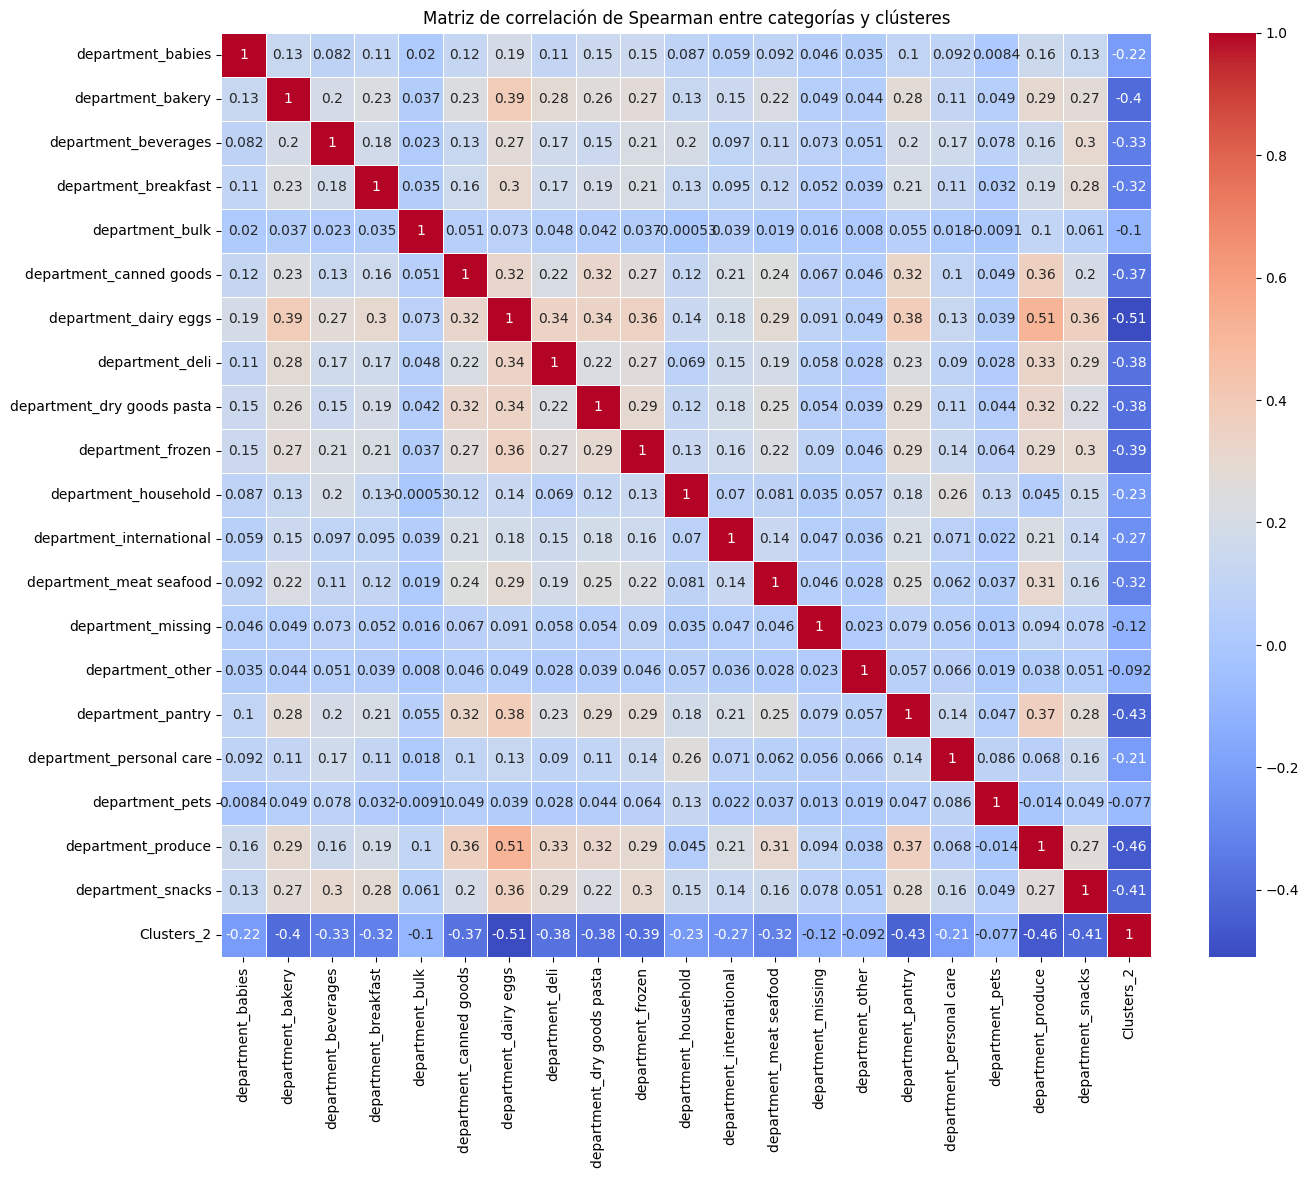

In [13]:
correlations = df_l2[department_columns + ['Clusters_2']].corr(method='spearman')

plt.figure(figsize=(15, 12))
sns.heatmap(correlations, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación de Spearman entre categorías y clústeres')
plt.show()

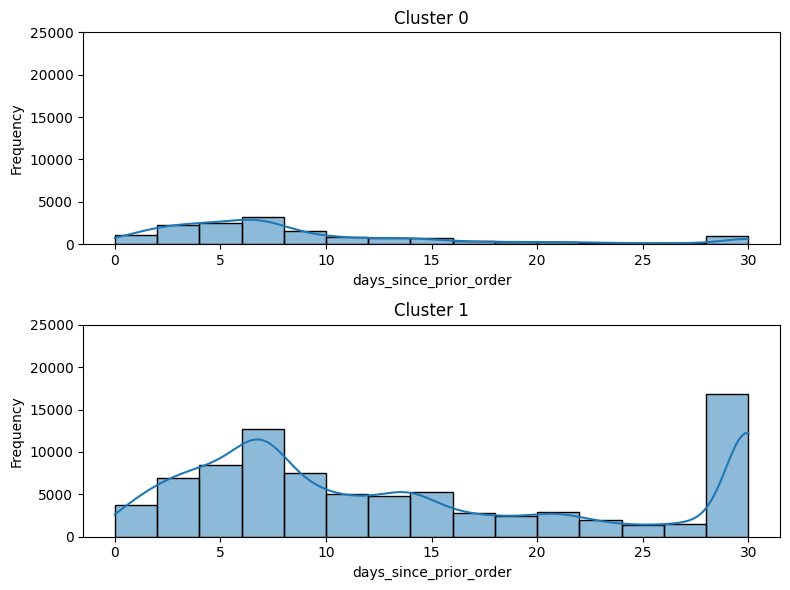

In [14]:
clusters_2 = df_l2['Clusters_2'].unique()
n_clusters = len(clusters_2)

n_cols = 1
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(8, 6))

if n_rows == 1:
    axes = [axes]

max_y = 25000
for cluster in clusters_2:
    max_y = max(max_y, df_l2[df_l2['Clusters_2'] == cluster]['days_since_prior_order'].value_counts().max())

for i, cluster in enumerate(clusters_2):
    sns.histplot(df_l2[df_l2['Clusters_2'] == cluster]['days_since_prior_order'], kde=True, bins=15, ax=axes[i])
    axes[i].set_title(f'Cluster {cluster}')
    axes[i].set_xlabel('days_since_prior_order')
    axes[i].set_ylabel('Frequency')
    axes[i].set_ylim(0, max_y)

plt.tight_layout()
plt.show()


#### Análisis Crítico de la Clusterización de Dos Clústeres

El análisis previo se basó en la segmentación de clientes en dos clústeres, describiendo sus diferencias y proponiendo estrategias específicas. Sin embargo, tras un examen más detallado, esta clusterización puede no ser adecuada debido a varias limitaciones observadas.

##### 1. Patrones Superpuestos
Gráfico de días desde el pedido anterior (days_since_prior_order):

Ambos clústeres muestran picos significativos en días similares (4-7 días y 30 días), esto evidencia una clara superposición en los hábitos de compra de los clientes.
Esta falta de diferenciación muestra que la clusterización no está capturando la diversidad de comportamientos del conjunto de clientes analizado.
Esto puede indicar también que la clusterización se encuentre agrupando comportamientos genéricos y no patrones distintivos.


##### 2. Preferencias por departamentos:

En varios departamentos, las proporciones de los clústeres son muy similares, lo cual indica que la segmentación en dos conjuntos no captura diferencias importantes en el consumo por categorías.


##### 3. Falta de Diversificación en las Preferencias

Los clientes de ambos clústeres presentan patrones de compra similares en departamentos como "Produce" (frescos) y "Dairy" (lácteos). Esto limita la utilidad de la clusterización para identificar estrategias diferenciadas.


#### Número Insuficiente de Clústeres
Dividir a los clientes en solo dos clústeres puede ser demasiado simplista para encontrar patrones de comportamiento de los consumidores.

Se infiere que un mayor número de clústeres puede permitir una segmentación más granular que refleje diferencias relevantes en variables como:
- Frecuencia de compra.
- Diversificación en diferentes departamentos.
- Volumen promedio por pedido.

### Clustering - K-Means - n=3

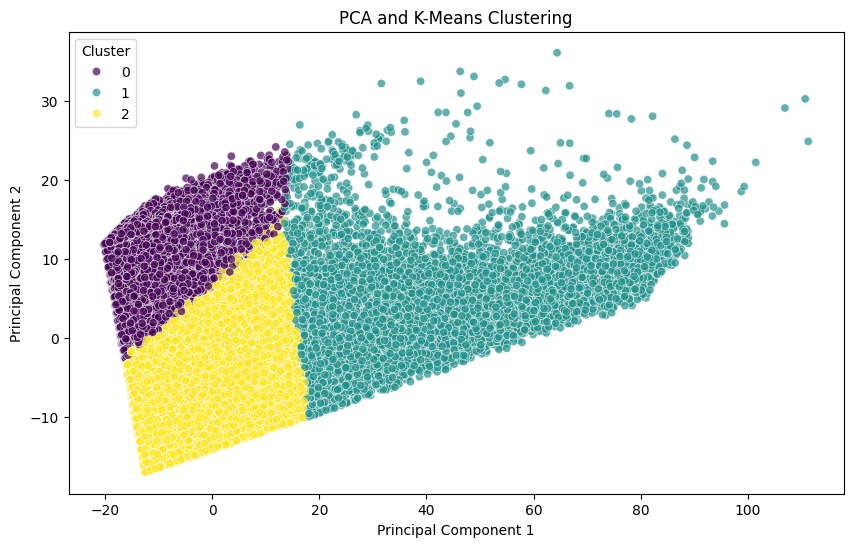

In [15]:
n_clusters = 3

kmeans3 = KMeans(n_clusters=n_clusters, random_state=100)
labels = kmeans3.fit_predict(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

df_c3 = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
df_c3['Cluster'] = labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_c3, palette='viridis', alpha=0.7)
plt.title('PCA and K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [16]:
df_l3 = df[['department_babies', 'department_bakery', 'department_beverages', 'department_breakfast', 'department_bulk', 
        'department_canned goods', 'department_dairy eggs', 'department_deli', 
        'department_dry goods pasta', 'department_frozen', 'department_household', 
        'department_international', 'department_meat seafood', 'department_missing', 
        'department_other', 'department_pantry', 'department_personal care', 
        'department_pets', 'department_produce', 'department_snacks', 'max_order', 'order_hour_of_day', 'days_since_prior_order']]

In [17]:
df_l3['Clusters_3'] = kmeans3.labels_

C:\Users\Matias\AppData\Local\Temp\ipykernel_27900\2088080857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_l3['Clusters_3'] = kmeans3.labels_


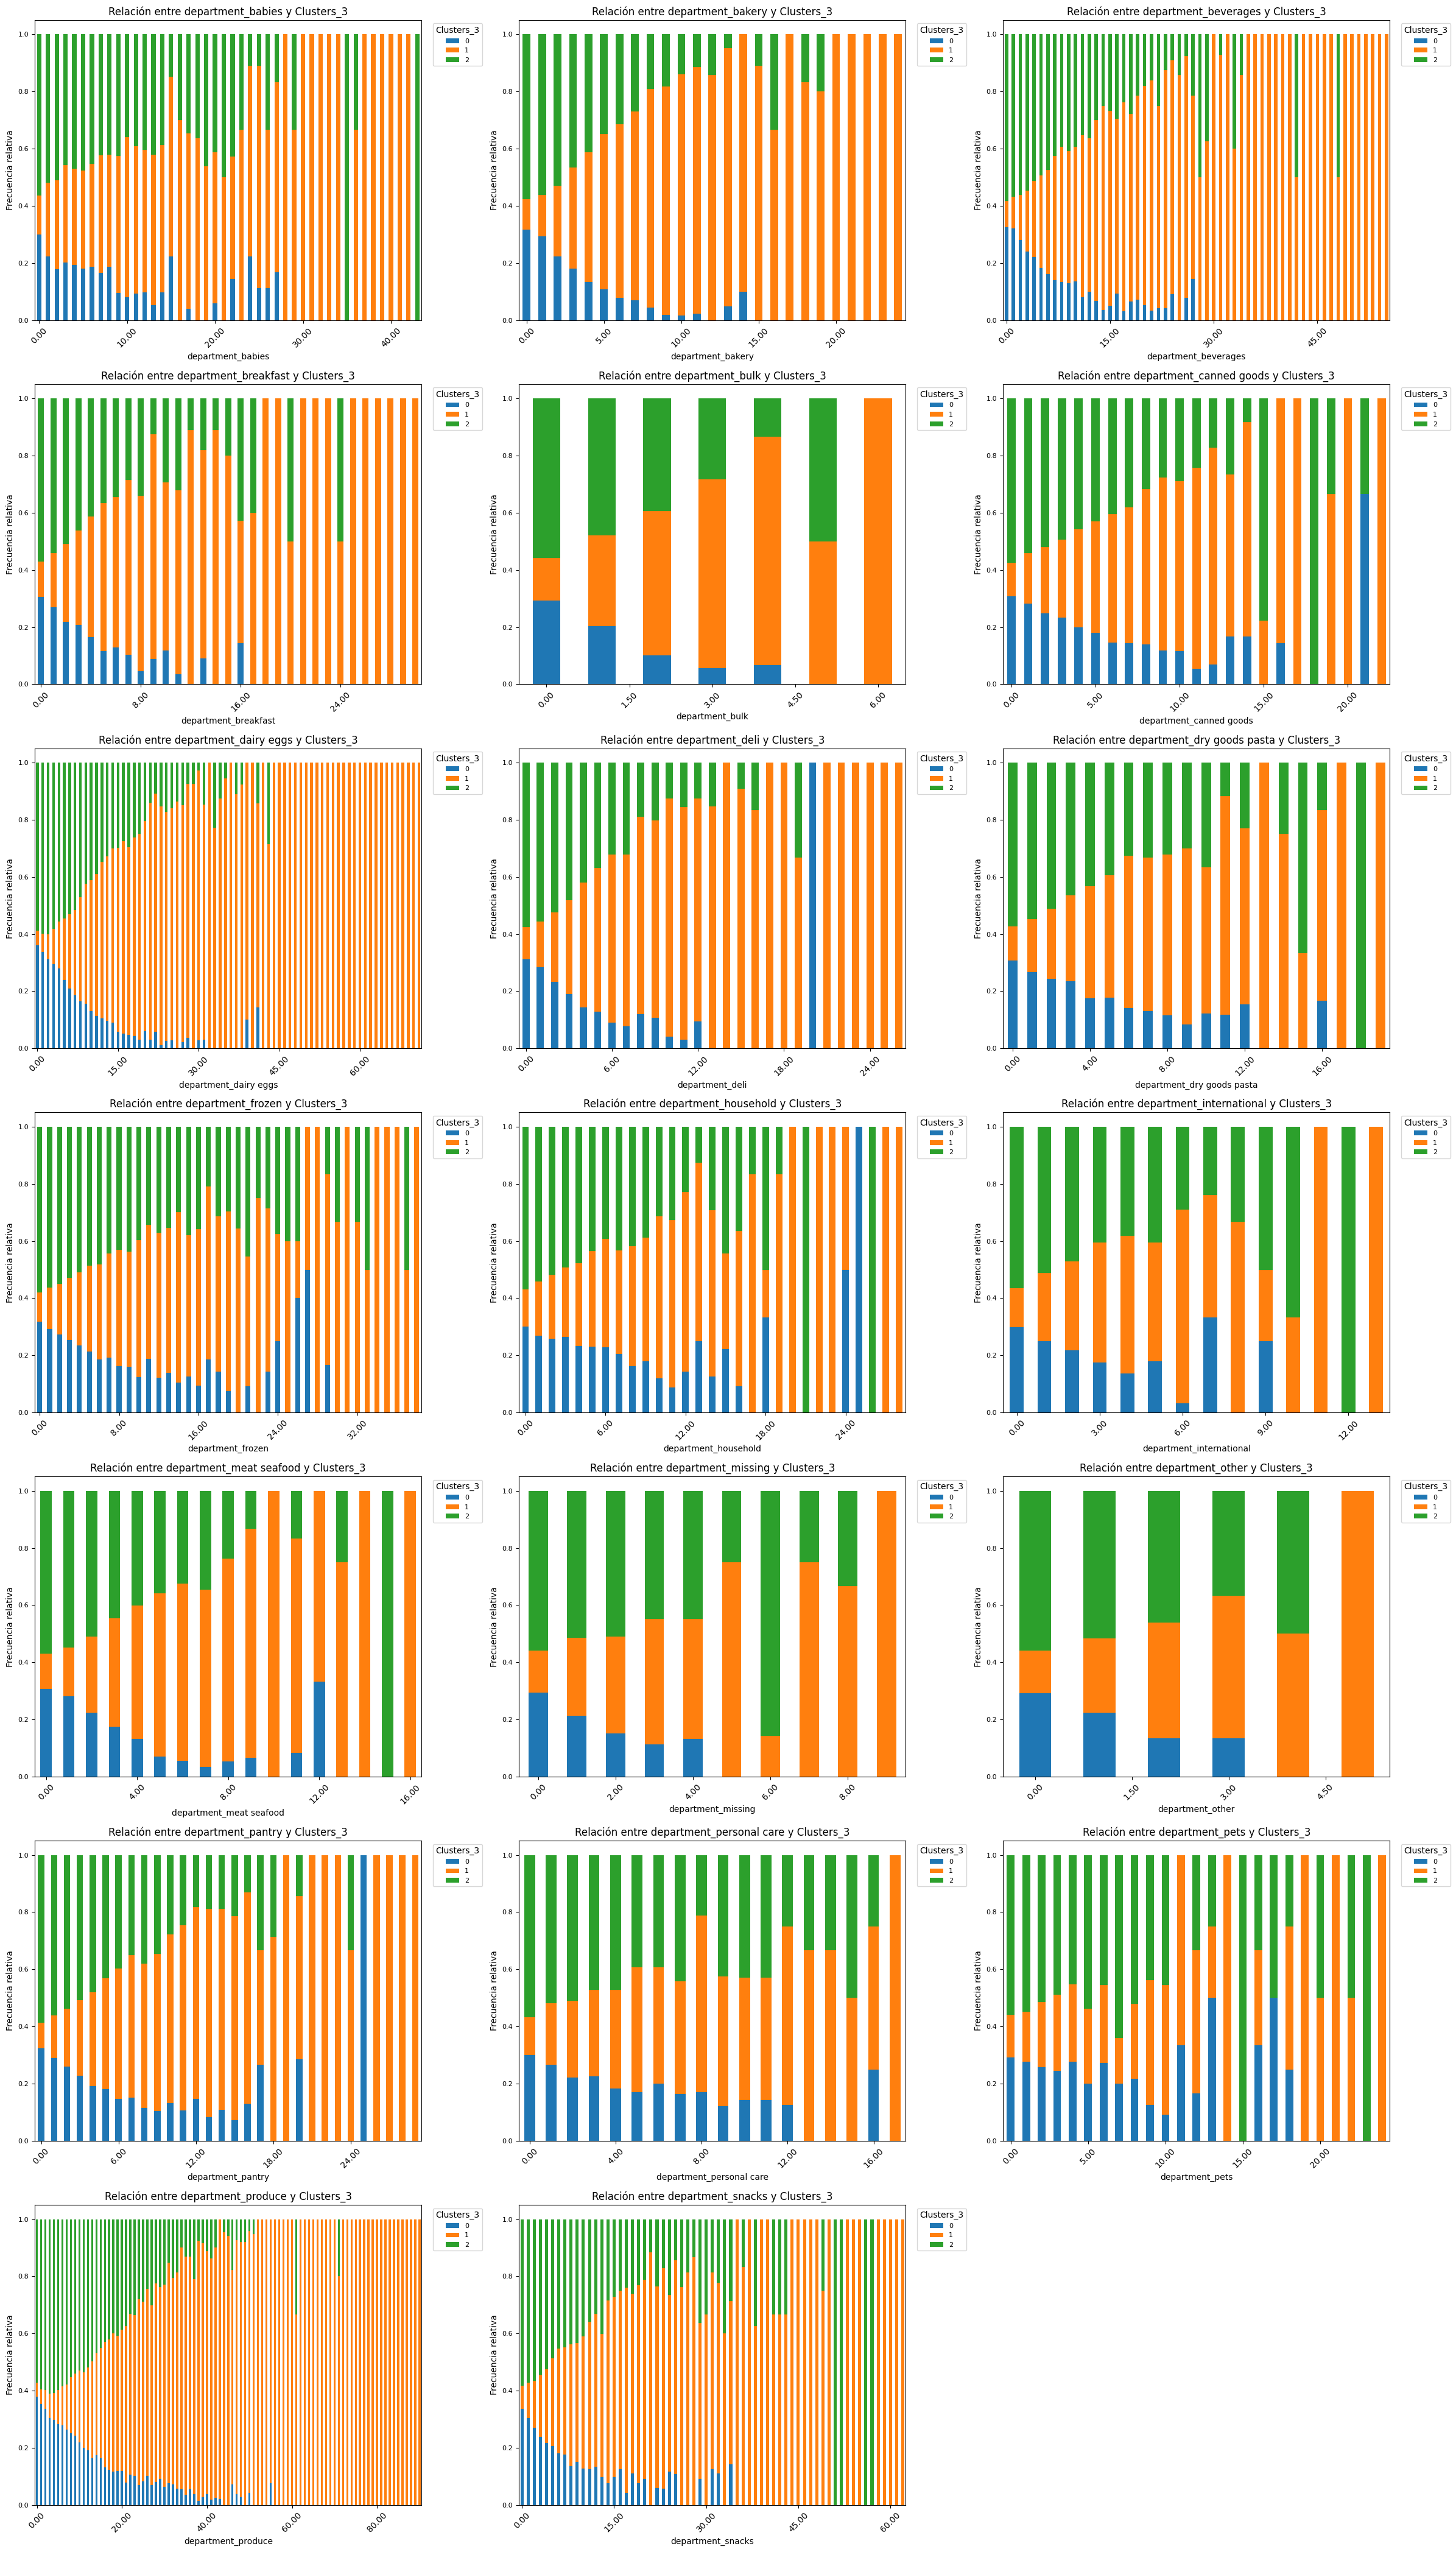

In [18]:
department_columns = [col for col in df_l3.columns if col.startswith('department')]

num_rows = 7
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 6 * num_rows))

for i, columna in enumerate(department_columns):
    if i >= num_rows * num_cols:
        break
    
    row = i // num_cols
    col = i % num_cols

    frecuencias = df_l3.groupby(columna)['Clusters_3'].value_counts(normalize=True).unstack()
    frecuencias.plot(kind='bar', stacked=True, ax=axs[row, col])
    
    axs[row, col].set_title(f'Relación entre {columna} y Clusters_3', fontsize=12)
    axs[row, col].set_xlabel(columna, fontsize=10)
    axs[row, col].set_ylabel('Frecuencia relativa', fontsize=10)
    axs[row, col].tick_params(axis='x', rotation=45, labelsize=10)
    axs[row, col].tick_params(axis='y', labelsize=8)

    axs[row, col].legend(title='Clusters_3', fontsize=8, bbox_to_anchor=(1.02, 1), loc='upper left')
    
    axs[row, col].xaxis.set_major_locator(ticker.MaxNLocator(5))
    axs[row, col].xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axs[j // num_cols, j % num_cols])

plt.tight_layout()
plt.show()

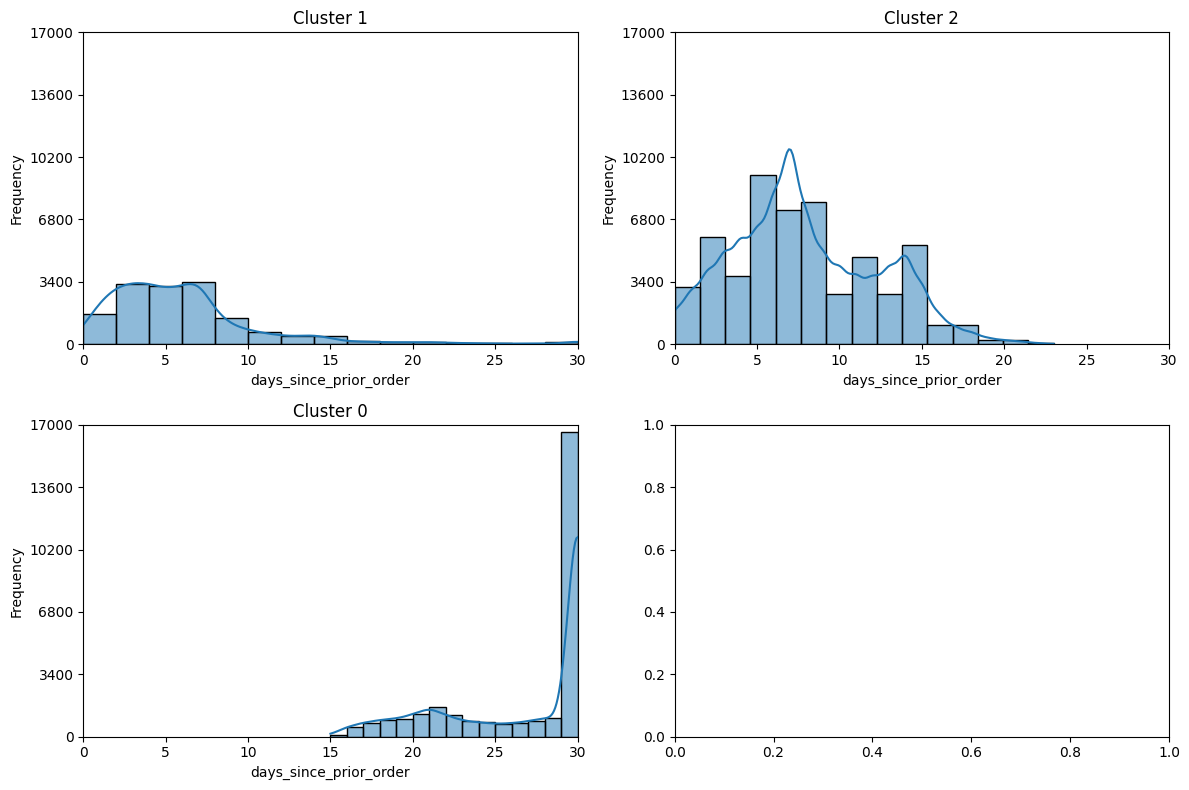

In [19]:
clusters = df_l3['Clusters_3'].unique()
n_clusters = len(clusters)

n_cols = 2
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

max_freq = 0
for cluster in clusters:
    freq, _ = np.histogram(df_l3[df_l3['Clusters_3'] == cluster]['days_since_prior_order'], bins=15)
    max_freq = max(max_freq, freq.max())

round_up_to_y = 1000 
max_freq_rounded = math.ceil(max_freq / round_up_to_y) * round_up_to_y

min_x = df_l3['days_since_prior_order'].min()
max_x = df_l3['days_since_prior_order'].max()

round_up_to_x = 5
min_x_rounded = math.floor(min_x / round_up_to_x) * round_up_to_x
max_x_rounded = math.ceil(max_x / round_up_to_x) * round_up_to_x

for i, cluster in enumerate(clusters):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(
        df_l3[df_l3['Clusters_3'] == cluster]['days_since_prior_order'],
        kde=True, bins=15, ax=axes[row, col]
    )
    axes[row, col].set_title(f'Cluster {cluster}')
    axes[row, col].set_xlabel('days_since_prior_order')
    axes[row, col].set_ylabel('Frequency')
    
    axes[row, col].set_ylim(0, max_freq_rounded)
       
    axes[row, col].set_xlim(min_x_rounded, max_x_rounded)
      
    axes[row, col].yaxis.set_ticks(range(0, max_freq_rounded + 1, max_freq_rounded // 5))
        
    axes[row, col].xaxis.set_ticks(range(min_x_rounded, max_x_rounded + 1, round_up_to_x))

plt.tight_layout()
plt.show()

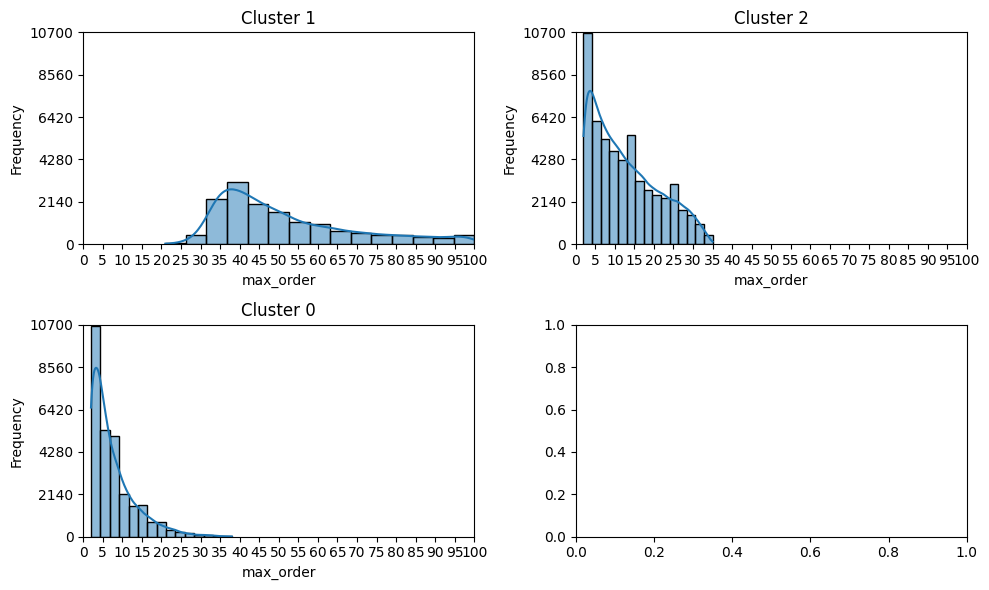

In [20]:
clusters = df_l3['Clusters_3'].unique()
n_clusters = len(clusters)

n_cols = 2
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 6))

max_freq = 0
for cluster in clusters:
    freq, _ = np.histogram(df_l3[df_l3['Clusters_3'] == cluster]['max_order'], bins=15)
    max_freq = max(max_freq, freq.max())

round_up_to_y = 100 
max_freq_rounded = math.ceil(max_freq / round_up_to_y) * round_up_to_y

min_x = df_l3['max_order'].min()
max_x = df_l3['max_order'].max()

round_up_to_x = 5
min_x_rounded = math.floor(min_x / round_up_to_x) * round_up_to_x
max_x_rounded = math.ceil(max_x / round_up_to_x) * round_up_to_x

for i, cluster in enumerate(clusters):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(
        df_l3[df_l3['Clusters_3'] == cluster]['max_order'],
        kde=True, bins=15, ax=axes[row, col]
    )
    axes[row, col].set_title(f'Cluster {cluster}')
    axes[row, col].set_xlabel('max_order')
    axes[row, col].set_ylabel('Frequency')
    
    axes[row, col].set_ylim(0, max_freq_rounded)
       
    axes[row, col].set_xlim(min_x_rounded, max_x_rounded)
      
    axes[row, col].yaxis.set_ticks(range(0, max_freq_rounded + 1, max_freq_rounded // 5))
        
    axes[row, col].xaxis.set_ticks(range(min_x_rounded, max_x_rounded + 1, round_up_to_x))

plt.tight_layout()
plt.show()


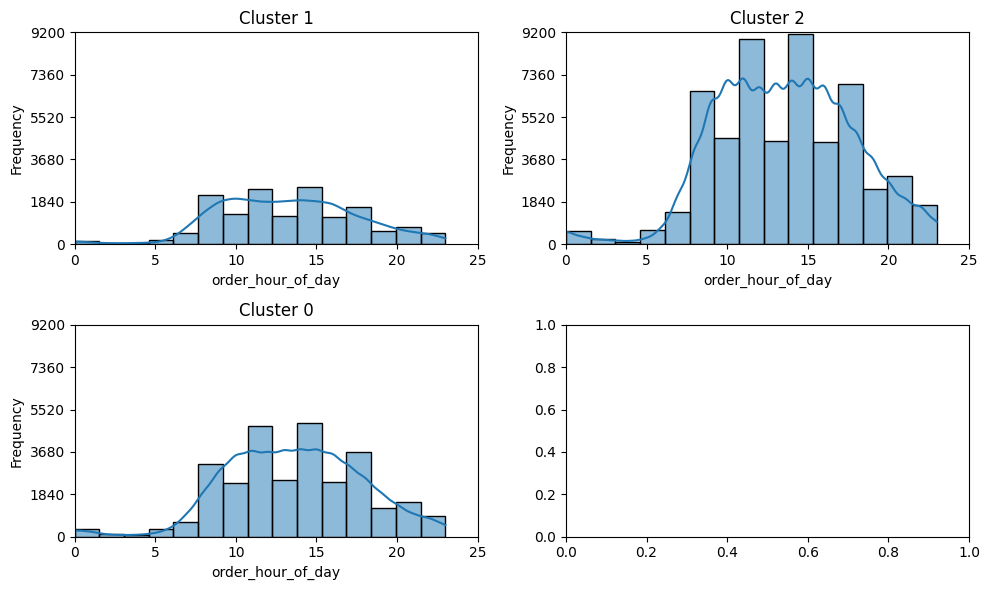

In [21]:
clusters = df_l3['Clusters_3'].unique()
n_clusters = len(clusters)

n_cols = 2
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 6))

max_freq = 0
for cluster in clusters:
    freq, _ = np.histogram(df_l3[df_l3['Clusters_3'] == cluster]['order_hour_of_day'], bins=15)
    max_freq = max(max_freq, freq.max())

round_up_to_y = 100 
max_freq_rounded = math.ceil(max_freq / round_up_to_y) * round_up_to_y

min_x = df_l3['order_hour_of_day'].min()
max_x = df_l3['order_hour_of_day'].max()

round_up_to_x = 5
min_x_rounded = math.floor(min_x / round_up_to_x) * round_up_to_x
max_x_rounded = math.ceil(max_x / round_up_to_x) * round_up_to_x

for i, cluster in enumerate(clusters):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(
        df_l3[df_l3['Clusters_3'] == cluster]['order_hour_of_day'],
        kde=True, bins=15, ax=axes[row, col]
    )
    axes[row, col].set_title(f'Cluster {cluster}')
    axes[row, col].set_xlabel('order_hour_of_day')
    axes[row, col].set_ylabel('Frequency')
    
    axes[row, col].set_ylim(0, max_freq_rounded)
       
    axes[row, col].set_xlim(min_x_rounded, max_x_rounded)
      
    axes[row, col].yaxis.set_ticks(range(0, max_freq_rounded + 1, max_freq_rounded // 5))
        
    axes[row, col].xaxis.set_ticks(range(min_x_rounded, max_x_rounded + 1, round_up_to_x))

plt.tight_layout()
plt.show()


In [22]:
stats = df_l3.groupby('Clusters_3').agg(['mean', 'median'])

mode_df = df_l3.groupby('Clusters_3').agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
mode_df.columns = pd.MultiIndex.from_product([mode_df.columns, ['mode']])

stats = pd.concat([stats, mode_df], axis=1)

stats_formatted = stats.style.format("{:.2f}").set_caption("Estadísticas Descriptivas por Clúster").set_properties(**{
    'text-align': 'center'}).set_table_styles([{
    'selector': 'caption',
    'props': 'caption-side: top; font-size:16px; font-weight:bold; text-align:center;'
}])

stats_formatted

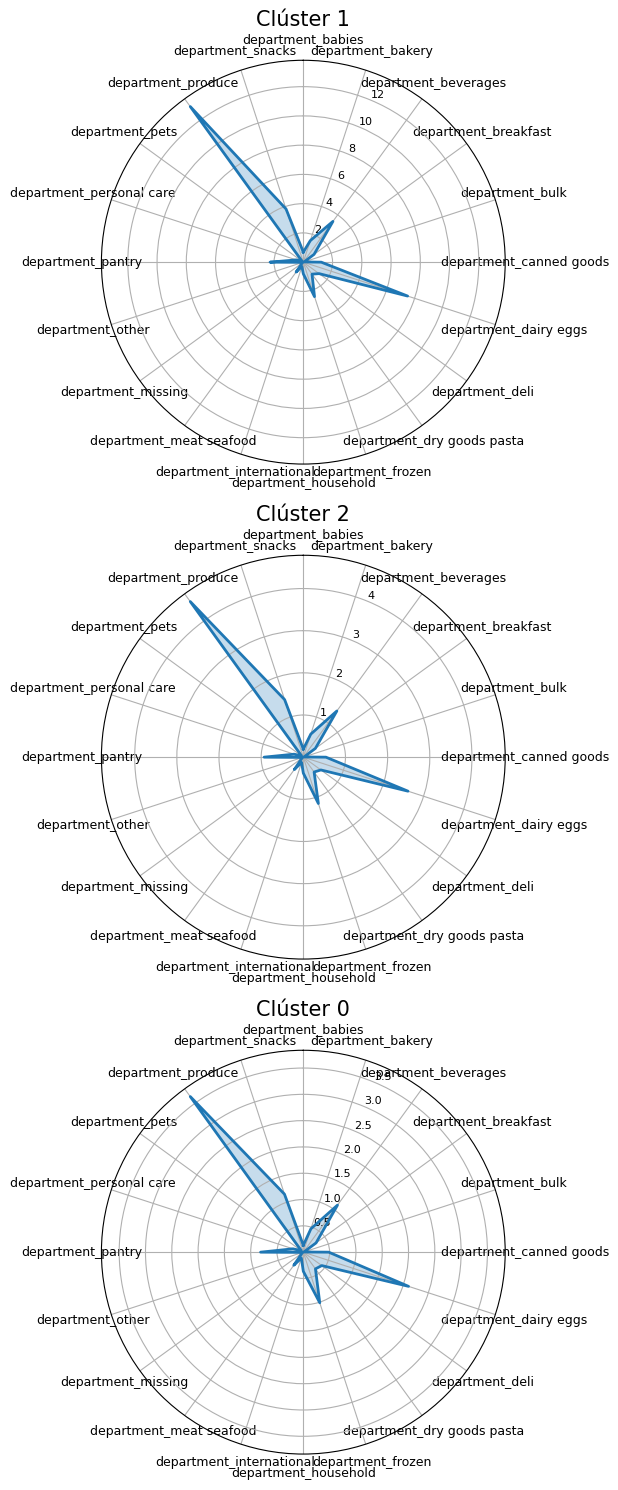

In [23]:
num_clusters = df_l3['Clusters_3'].nunique()
categories = department_columns

fig, axes = plt.subplots(num_clusters, 1, subplot_kw={'polar': True}, figsize=(10, 15))

for i, cluster in enumerate(df_l3['Clusters_3'].unique()):
    values = df_l3[df_l3['Clusters_3'] == cluster][categories].mean().values.flatten().tolist()
    values += values[:1] 
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]
    
    ax = axes[i] if num_clusters > 1 else axes
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    ax.plot(angles, values, linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha=0.25)
    ax.set_title(f'Clúster {cluster}', size=15)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=9)
    ax.tick_params(axis='y', labelsize=8)

plt.tight_layout()
plt.show()

#### Análisis Crítico de la Clusterización de Tres Clústeres

##### 1. Solapamiento entre clusters
Los histogramas muestran una **alta superposición en los valores de "días desde la última compra"** entre los clusters, especialmente entre los clusters 0 y 2. Esto indica que los clusters no están claramente diferenciados y que no existe una segmentación clara que permita identificar comportamientos distintos entre los grupos.

##### 2. Distribuciones no homogéneas dentro de los clusters
El cluster 1 presenta una **distribución peculiar**, con un pico significativo en el extremo de los 30 días, lo que indica un patrón de compras mensuales. Sin embargo, este mismo cluster también tiene una cantidad considerable de compras más frecuentes, lo que sugiere una falta de cohesión dentro del cluster. Esto dificulta interpretaciones consistentes y una segmentación adecuada.

##### 3. Falta de utilidad práctica para la segmentación
Para que una clusterización sea útil, cada cluster debe representar un grupo de clientes con **patrones claramente diferenciados**. En este caso, no hay suficiente evidencia de que los clusters identificados sean representativos de patrones distintos de comportamiento. Por ejemplo, no se distingue adecuadamente entre clientes que compran semanalmente, quincenalmente o mensualmente.

##### 4. Desequilibrio en la frecuencia de observaciones entre clusters
Hay una **disparidad significativa en el tamaño de los clusters**, con el cluster 1 dominando claramente en términos de frecuencia. Esto puede sesgar cualquier análisis posterior y limitar la utilidad de los clusters más pequeños (como el cluster 2).

Por lo tanto, se decide avanzar con nuevos escenarios de clusterizacion

### Clustering - K-Means - n=4

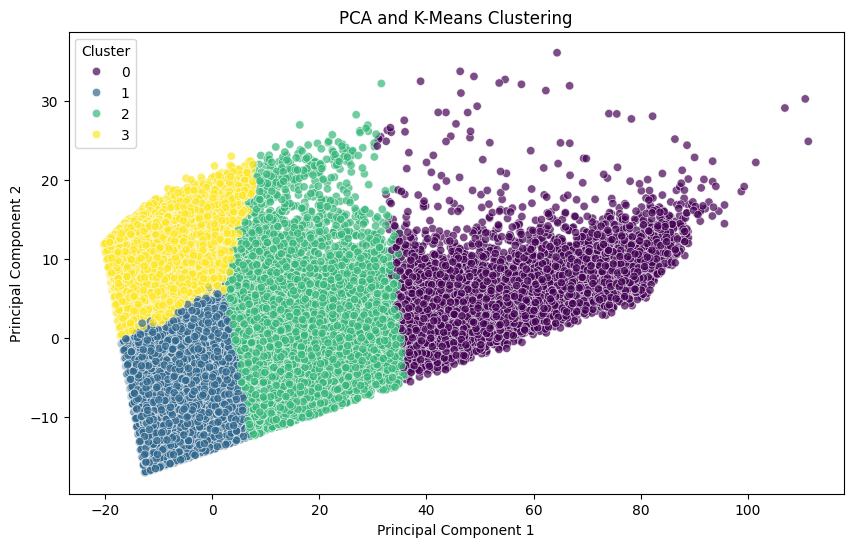

In [24]:
n_clusters = 4

kmeans4 = KMeans(n_clusters=n_clusters, random_state=100)
labels = kmeans4.fit_predict(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

df_c2 = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
df_c2['Cluster'] = labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_c2, palette='viridis', alpha=0.7)
plt.title('PCA and K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [25]:
df_l4 = df[['user_id','department_babies', 'department_bakery', 'department_beverages', 'department_breakfast', 'department_bulk', 
        'department_canned goods', 'department_dairy eggs', 'department_deli', 
        'department_dry goods pasta', 'department_frozen', 'department_household', 
        'department_international', 'department_meat seafood', 'department_missing', 
        'department_other', 'department_pantry', 'department_personal care', 
        'department_pets', 'department_produce', 'department_snacks', 'max_order', 'order_hour_of_day', 'days_since_prior_order']]

In [26]:
df_l4['Clusters_4'] = kmeans4.labels_

C:\Users\Matias\AppData\Local\Temp\ipykernel_27900\3530558166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_l4['Clusters_4'] = kmeans4.labels_


In [27]:
df_l4.head()

user_id  department_babies  department_bakery  department_beverages  \
0   147243                  0                  1                     1   
1   195275                  0                  3                     4   
2    58222                  0                  0                     1   
3   120094                  0                  0                     2   
4    53959                  2                  0                     3   

   department_breakfast  department_bulk  department_canned goods  \
0                     2                0                        2   
1                     0                0                        0   
2                     0                0                        0   
3                     0                0                        0   
4                     1                0                        0   

   department_dairy eggs  department_deli  department_dry goods pasta  ...  \
0                     31                7                           3  ...   
1                      6                1                           4  ...   
2                      6                0                           0  ...   
3                      1                0                           0  ...   
4                      4                0                           0  ...   

   department_other  department_pantry  department_personal care  \
0                 0                  4                         1   
1                 0                  1                         0   
2                 0                  4                         0   
3                 0                  1                         0   
4                 0                  0                         9   

   department_pets  department_produce  department_snacks  max_order  \
0                0                  18                  4         38   
1                0                  24                  5         90   
2                0                   3                  0          3   
3                0                   3                  1         18   
4                0                   5                  2          8   

   order_hour_of_day  days_since_prior_order  Clusters_4  
0                 16                     3.0           2  
1                 11                     3.0           0  
2                 11                     6.0           1  
3                 17                     7.0           1  
4                  1                    30.0           3  

[5 rows x 25 columns]

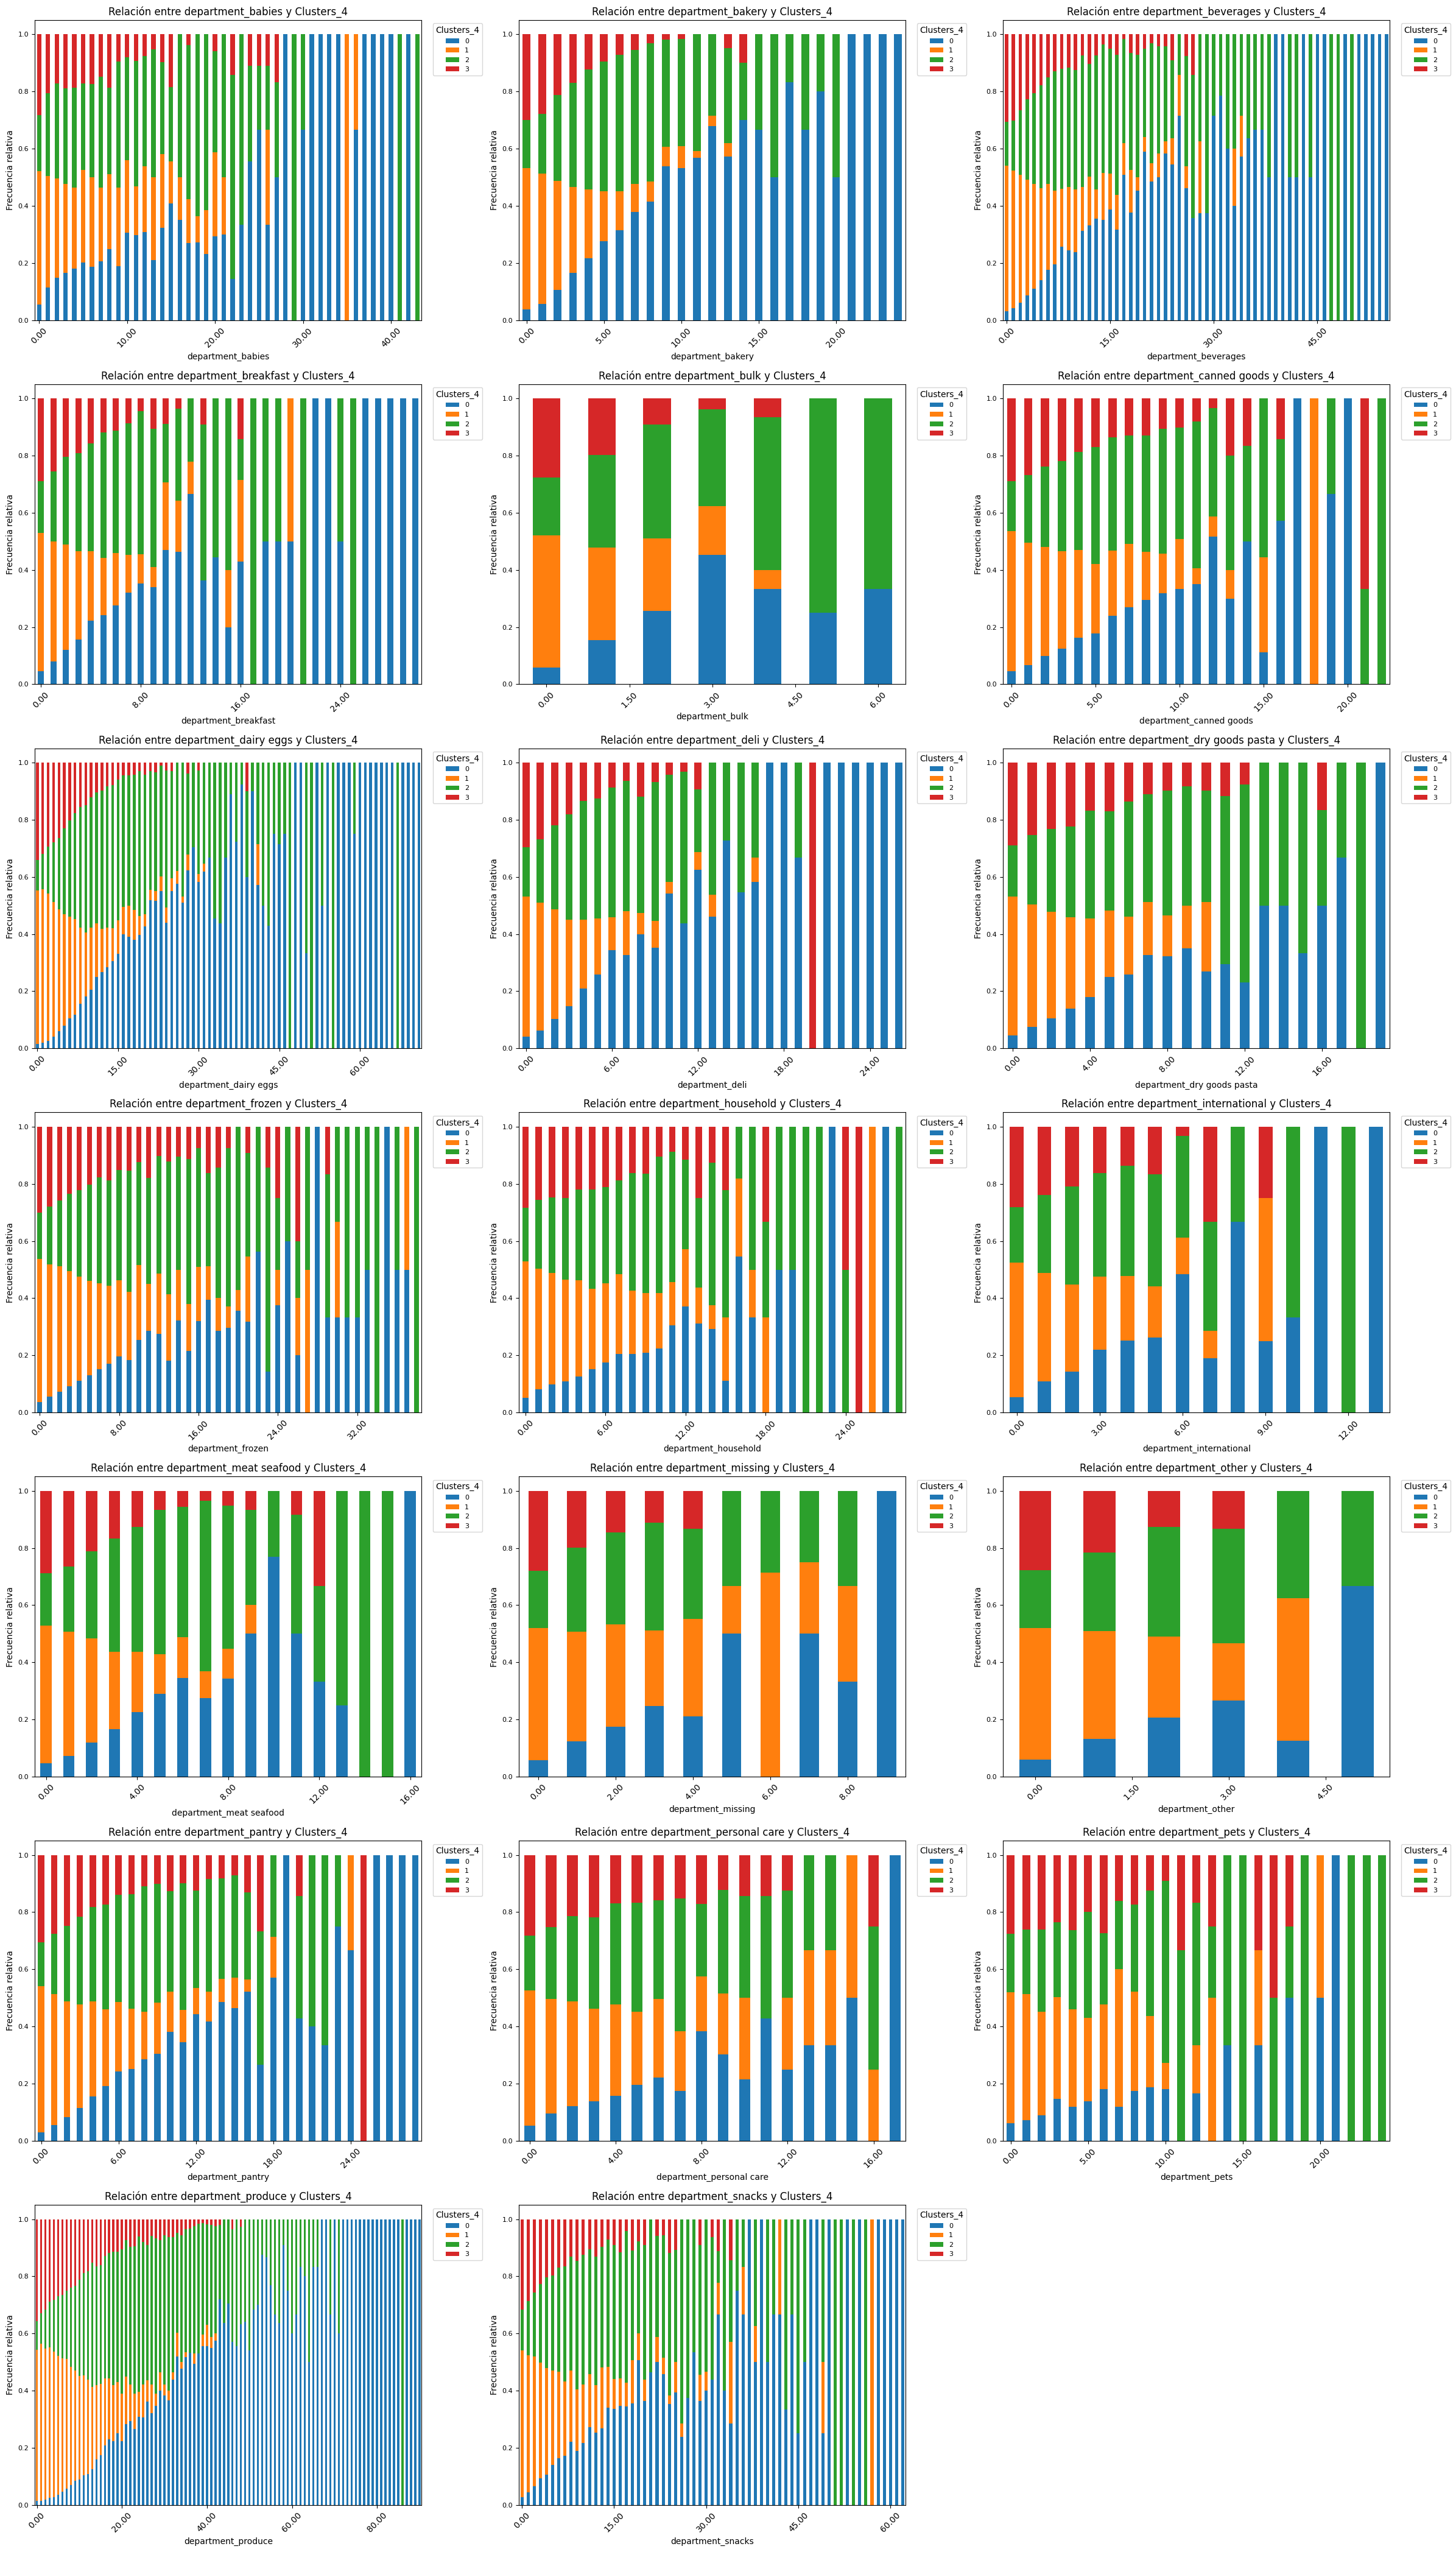

In [28]:
department_columns = [col for col in df_l4.columns if col.startswith('department')]

num_rows = 7
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 6 * num_rows))

for i, columna in enumerate(department_columns):
    if i >= num_rows * num_cols:
        break
    
    row = i // num_cols
    col = i % num_cols

    frecuencias = df_l4.groupby(columna)['Clusters_4'].value_counts(normalize=True).unstack()
    frecuencias.plot(kind='bar', stacked=True, ax=axs[row, col])
    
    axs[row, col].set_title(f'Relación entre {columna} y Clusters_4', fontsize=12)
    axs[row, col].set_xlabel(columna, fontsize=10)
    axs[row, col].set_ylabel('Frecuencia relativa', fontsize=10)
    axs[row, col].tick_params(axis='x', rotation=45, labelsize=10)
    axs[row, col].tick_params(axis='y', labelsize=8)

    axs[row, col].legend(title='Clusters_4', fontsize=8, bbox_to_anchor=(1.02, 1), loc='upper left')
    
    axs[row, col].xaxis.set_major_locator(ticker.MaxNLocator(5))
    axs[row, col].xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axs[j // num_cols, j % num_cols])

plt.tight_layout()
plt.show()

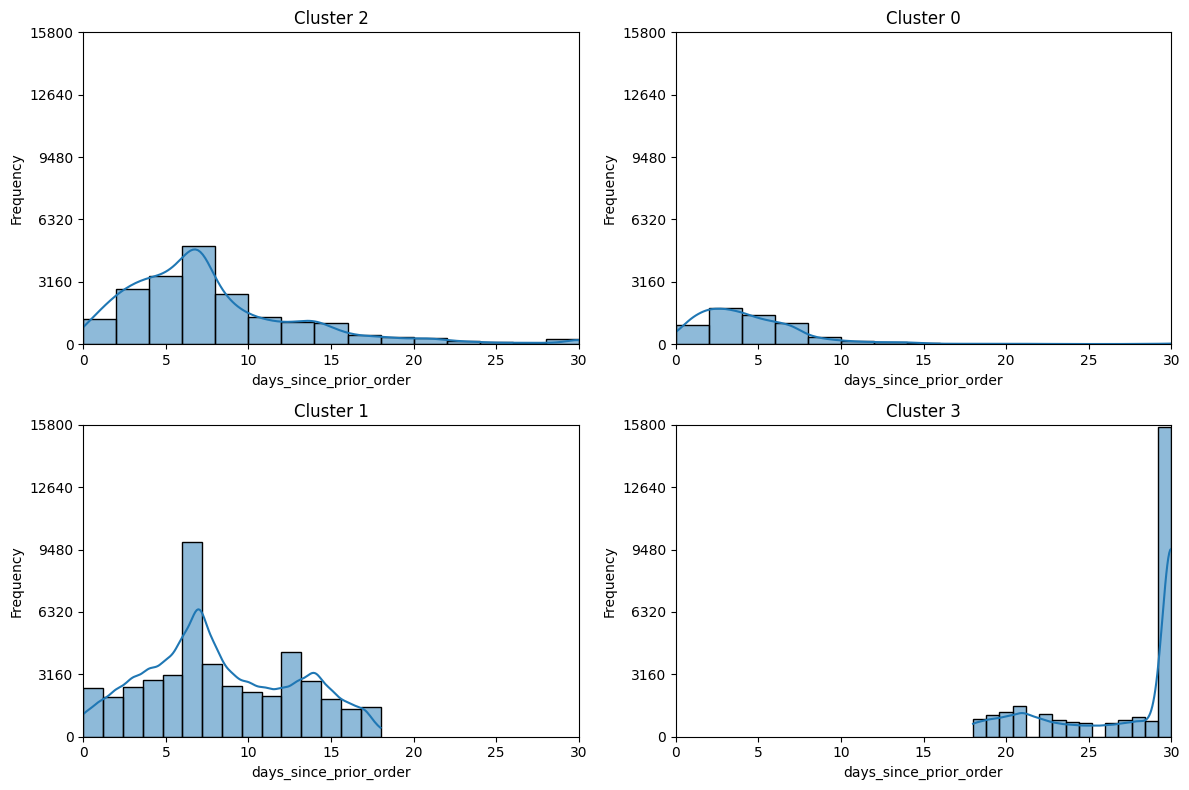

In [29]:
clusters = df_l4['Clusters_4'].unique()
n_clusters = len(clusters)

n_cols = 2
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

max_freq = 0
for cluster in clusters:
    freq, _ = np.histogram(df_l4[df_l4['Clusters_4'] == cluster]['days_since_prior_order'], bins=15)
    max_freq = max(max_freq, freq.max())

round_up_to_y = 100 
max_freq_rounded = math.ceil(max_freq / round_up_to_y) * round_up_to_y

min_x = df_l4['days_since_prior_order'].min()
max_x = df_l4['days_since_prior_order'].max()

round_up_to_x = 5
min_x_rounded = math.floor(min_x / round_up_to_x) * round_up_to_x
max_x_rounded = math.ceil(max_x / round_up_to_x) * round_up_to_x

for i, cluster in enumerate(clusters):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(
        df_l4[df_l4['Clusters_4'] == cluster]['days_since_prior_order'],
        kde=True, bins=15, ax=axes[row, col]
    )
    axes[row, col].set_title(f'Cluster {cluster}')
    axes[row, col].set_xlabel('days_since_prior_order')
    axes[row, col].set_ylabel('Frequency')
    
    axes[row, col].set_ylim(0, max_freq_rounded)
       
    axes[row, col].set_xlim(min_x_rounded, max_x_rounded)
      
    axes[row, col].yaxis.set_ticks(range(0, max_freq_rounded + 1, max_freq_rounded // 5))
        
    axes[row, col].xaxis.set_ticks(range(min_x_rounded, max_x_rounded + 1, round_up_to_x))

plt.tight_layout()
plt.show()

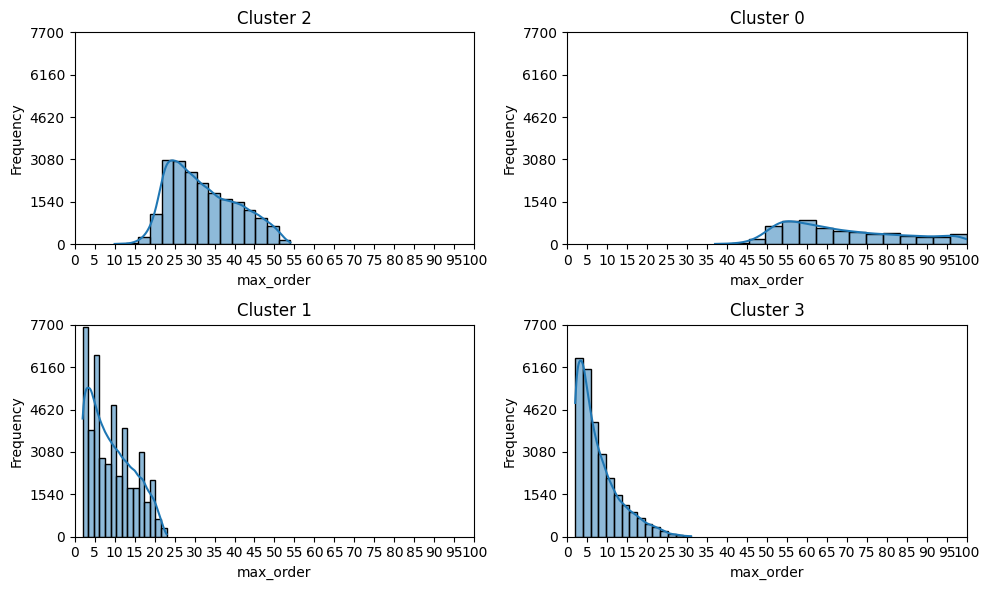

In [30]:
clusters = df_l4['Clusters_4'].unique()
n_clusters = len(clusters)

n_cols = 2
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 6))

max_freq = 0
for cluster in clusters:
    freq, _ = np.histogram(df_l4[df_l4['Clusters_4'] == cluster]['max_order'], bins=15)
    max_freq = max(max_freq, freq.max())

round_up_to_y = 100 
max_freq_rounded = math.ceil(max_freq / round_up_to_y) * round_up_to_y

min_x = df_l4['max_order'].min()
max_x = df_l4['max_order'].max()

round_up_to_x = 5
min_x_rounded = math.floor(min_x / round_up_to_x) * round_up_to_x
max_x_rounded = math.ceil(max_x / round_up_to_x) * round_up_to_x

for i, cluster in enumerate(clusters):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(
        df_l4[df_l4['Clusters_4'] == cluster]['max_order'],
        kde=True, bins=15, ax=axes[row, col]
    )
    axes[row, col].set_title(f'Cluster {cluster}')
    axes[row, col].set_xlabel('max_order')
    axes[row, col].set_ylabel('Frequency')
    
    axes[row, col].set_ylim(0, max_freq_rounded)
       
    axes[row, col].set_xlim(min_x_rounded, max_x_rounded)
      
    axes[row, col].yaxis.set_ticks(range(0, max_freq_rounded + 1, max_freq_rounded // 5))
        
    axes[row, col].xaxis.set_ticks(range(min_x_rounded, max_x_rounded + 1, round_up_to_x))

plt.tight_layout()
plt.show()



In [31]:
product_columns = [col for col in df_l4.columns if col.startswith('department_')]

cluster_product_totals = df_l4.groupby('Clusters_4')[product_columns].sum()

print(cluster_product_totals)

            department_babies  department_bakery  department_beverages  \
Clusters_4                                                               
0                        5661              11614                 25898   
1                        6795              22113                 52445   
2                        8619              21981                 49696   
3                        3558              12722                 30061   

            department_breakfast  department_bulk  department_canned goods  \
Clusters_4                                                                   
0                           6648              421                     8654   
1                          13699              577                    20728   
2                          13250              721                    19275   
3                           8136              317                    13187   

            department_dairy eggs  department_deli  \
Clusters_4                      

#### Análisis Crítico de la Clusterización de Cuatro Clústeres

##### 1. Separación de Clusters (Gráfica PCA y K-Means Clustering):
   - En la gráfica de PCA se observa una clara separación entre los clusters, esto indica que los datos poseen patrones definidos diferenciados entre si.
   - Cada cluster ocupa una región distinta en el espacio reducido por PCA, esto sugiere que las características seleccionadas son buenas para la segmentación.

##### 2. Distribución por 'days_since_prior_order':
   - Cada cluster tiene patrones diferenciados en cuanto a la distribución de días desde el último pedido:
     - **Cluster 0**: Distribución centrada en valores bajos (0 a 10 días), lo que podría representar usuarios frecuentes.
     - **Cluster 1**: Distribución bimodal con picos en el rango de 4 y 9 días, representando un comportamiento intermedio. En este cluster, no hay clientes que tengan una frecuencia de compra mayor a 20 días.
     - **Cluster 2**: Distribución con mayor densidad en valores muy bajos, lo que sugiere usuarios que realizan pedidos casi diarios.
     - **Cluster 3**: Mayor frecuencia en los días cercanos a 30, este cluster centraliza a clientes que realizan compras mensuales.

##### 3. Relación entre Departamentos y Clusters:

   - **Cluster 0**: Alta representación en `department_beverages`, lo que indica interés en consumo de bebidas.
   - **Cluster 3**: Alta proporción en `department_canned_goods`, `department_personal_care`, `department_pets`  reflejando un comportamiento de compra familiar, que busca productos de surtido mensual.

   - Estos ejemplos evidencian que los clusters capturan no solo frecuencia de compra, sino también preferencias específicas por categorías de productos.

##### 3. Totales por Departamento y Cluster:
   - El desglose de ventas por cluster y departamento confirma los patrones observados en los gráficos generados.

   - **Cluster 1** es el que presenta los valores más altos en la mayoría de los departamentos, lo que sugiere que estos usuarios compran una variedad amplia de productos con una alta frecuencia.
   - **Cluster 2**, es el más pequeño en cuanto a cantidades, y tiene un comportamiento concentrado en departamentos esenciales como `bakery` y `dairy eggs`.

#### Interpretación para motor de predicción:
   - Los clusters son diferenciables por comportamiento de compra, frecuencia y categorías de productos.
   - Estas características permiten segmentar usuarios para estrategias de recomendación personalizadas:
     - Usuarios frecuentes con necesidades básicas (Cluster 2).
     - Compradores mensuales con pedidos grandes (Cluster 3).
     - Consumidores con preferencias diversificadas (Cluster 1).
     - Usuarios regulares con compras predecibles (Cluster 0).

---

#### Conclusión
La clusterización en 4 grupos es efectiva porque:
- Los clusters muestran separaciones claras en las dimensiones analizadas.
- Capturan patrones únicos en frecuencia de compra y preferencias de productos.
- Lo previamente enunciado permite personalizar estrategias de marketing y recomendaciones, además de optimizar la experiencia del cliente y generar estrategias que maximicen el impacto comercial.


---

### Clustering - K-Means - n=5

Si bien la clusterización anterior arroja resultados positivos, se decide avanzar con la implementación de 5 clusters para analizar como se comportan los diferentes grupos generados y buscar una mejora en la segmentación de clientes.

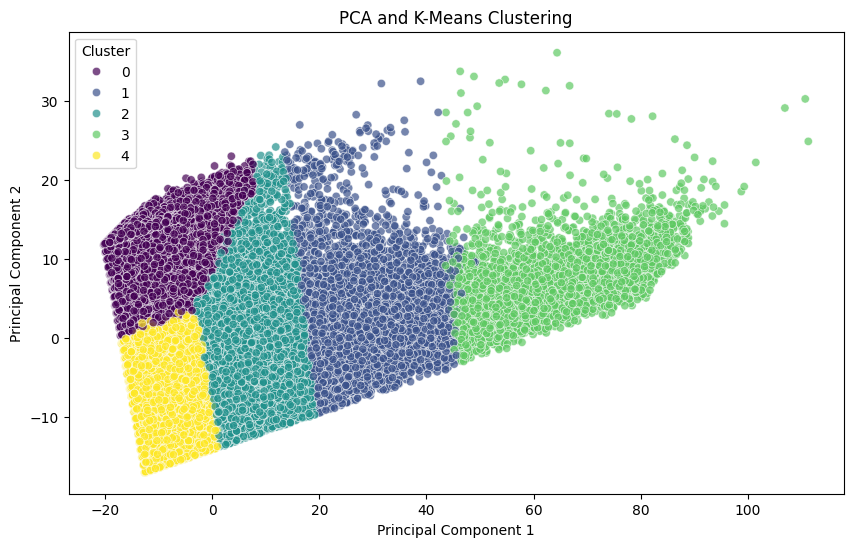

In [32]:
n_clusters = 5

kmeans5 = KMeans(n_clusters=n_clusters, random_state=100)
labels = kmeans5.fit_predict(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

df_c5 = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
df_c5['Cluster'] = labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_c5, palette='viridis', alpha=0.7)
plt.title('PCA and K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [33]:
df_l5 = df[['department_babies', 'department_bakery', 'department_beverages', 'department_breakfast', 'department_bulk', 
        'department_canned goods', 'department_dairy eggs', 'department_deli', 
        'department_dry goods pasta', 'department_frozen', 'department_household', 
        'department_international', 'department_meat seafood', 'department_missing', 
        'department_other', 'department_pantry', 'department_personal care', 
        'department_pets', 'department_produce', 'department_snacks', 'max_order', 'order_hour_of_day', 'days_since_prior_order']]

In [34]:
df_l5['Clusters_5'] = kmeans5.labels_

C:\Users\Matias\AppData\Local\Temp\ipykernel_27900\2224673139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_l5['Clusters_5'] = kmeans5.labels_


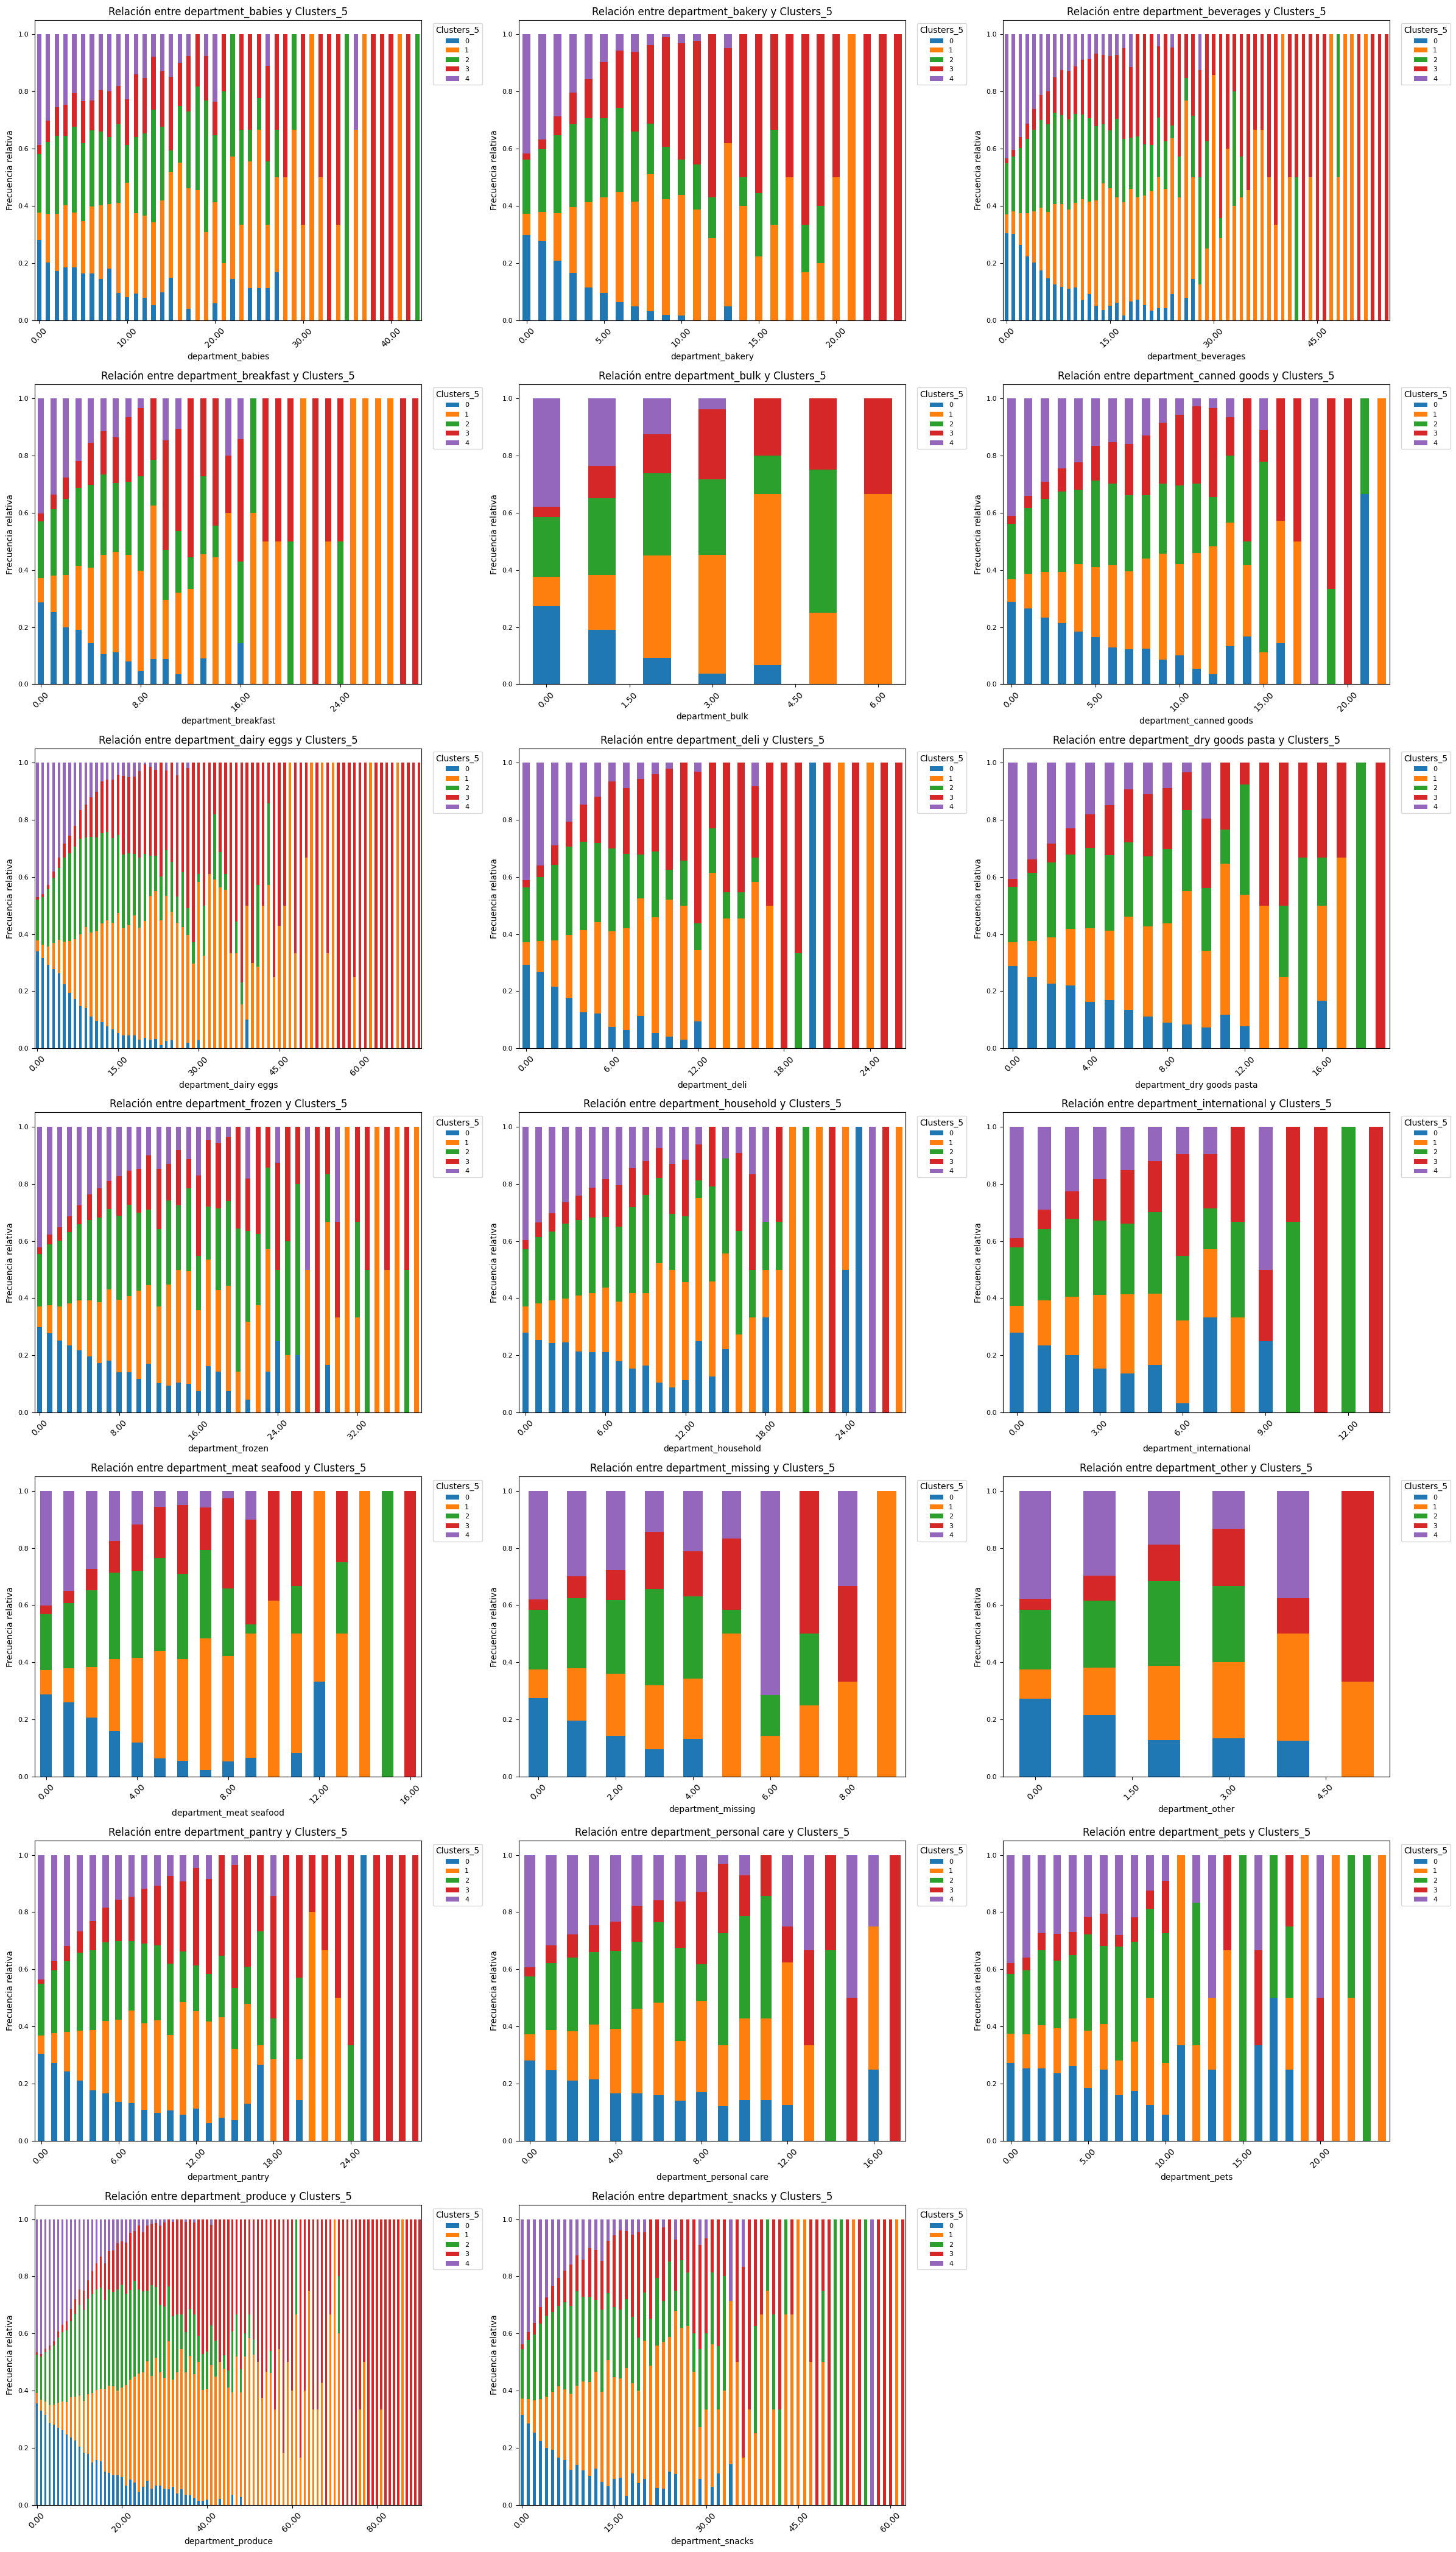

In [35]:
department_columns = [col for col in df_l5.columns if col.startswith('department')]

num_rows = 7
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 6 * num_rows))

for i, columna in enumerate(department_columns):
    if i >= num_rows * num_cols:
        break
    
    row = i // num_cols
    col = i % num_cols

    frecuencias = df_l5.groupby(columna)['Clusters_5'].value_counts(normalize=True).unstack()
    frecuencias.plot(kind='bar', stacked=True, ax=axs[row, col])
    
    axs[row, col].set_title(f'Relación entre {columna} y Clusters_5', fontsize=12)
    axs[row, col].set_xlabel(columna, fontsize=10)
    axs[row, col].set_ylabel('Frecuencia relativa', fontsize=10)
    axs[row, col].tick_params(axis='x', rotation=45, labelsize=10)
    axs[row, col].tick_params(axis='y', labelsize=8)

    axs[row, col].legend(title='Clusters_5', fontsize=8, bbox_to_anchor=(1.02, 1), loc='upper left')
    
    axs[row, col].xaxis.set_major_locator(ticker.MaxNLocator(5))
    axs[row, col].xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axs[j // num_cols, j % num_cols])

plt.tight_layout()
plt.show()

In [36]:
stats = df_l5.groupby('Clusters_5').agg(['mean', 'median'])

mode_df = df_l5.groupby('Clusters_5').agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
mode_df.columns = pd.MultiIndex.from_product([mode_df.columns, ['mode']])

stats = pd.concat([stats, mode_df], axis=1)

stats_formatted = stats.style.format("{:.2f}").set_caption("Estadísticas Descriptivas por Clúster").set_properties(**{
    'text-align': 'center'}).set_table_styles([{
    'selector': 'caption',
    'props': 'caption-side: top; font-size:16px; font-weight:bold; text-align:center;'
}])

stats_formatted

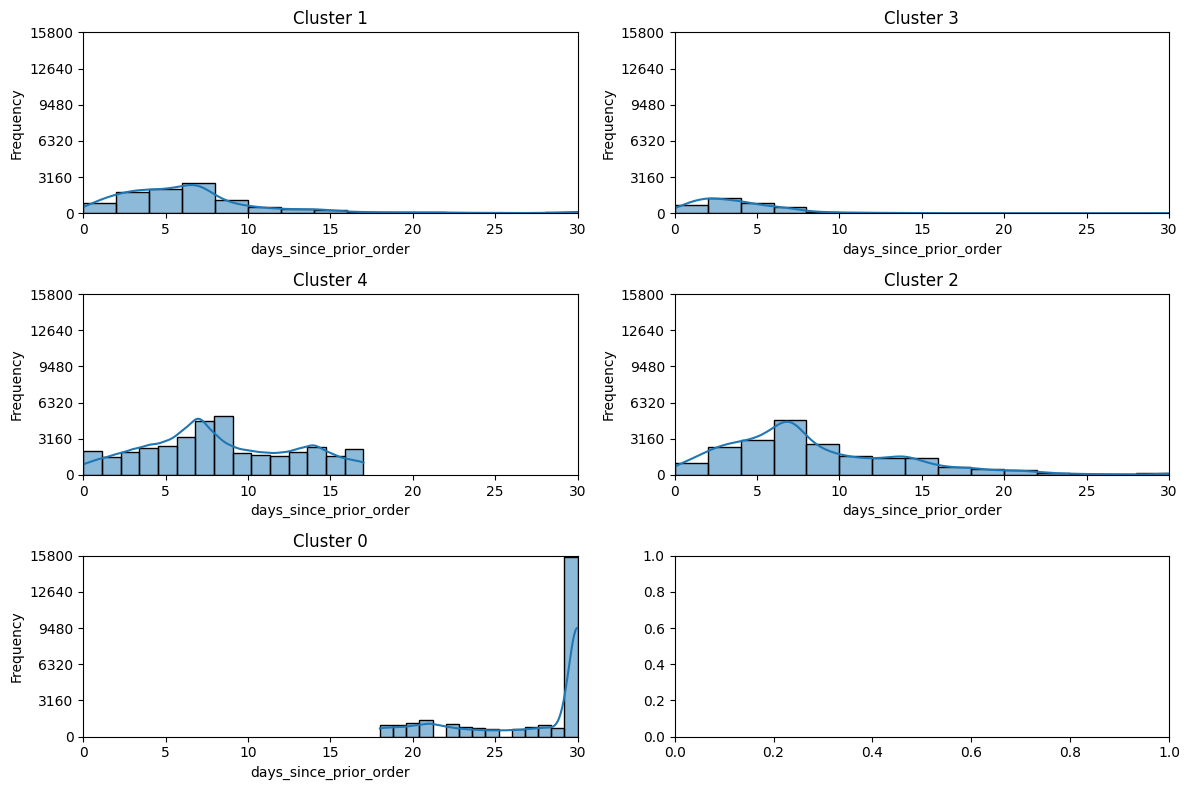

In [37]:
clusters = df_l5['Clusters_5'].unique()
n_clusters = len(clusters)

n_cols = 2
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

max_freq = 0
for cluster in clusters:
    freq, _ = np.histogram(df_l5[df_l5['Clusters_5'] == cluster]['days_since_prior_order'], bins=15)
    max_freq = max(max_freq, freq.max())

round_up_to_y = 100 
max_freq_rounded = math.ceil(max_freq / round_up_to_y) * round_up_to_y

min_x = df_l5['days_since_prior_order'].min()
max_x = df_l5['days_since_prior_order'].max()

round_up_to_x = 5
min_x_rounded = math.floor(min_x / round_up_to_x) * round_up_to_x
max_x_rounded = math.ceil(max_x / round_up_to_x) * round_up_to_x

for i, cluster in enumerate(clusters):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(
        df_l5[df_l5['Clusters_5'] == cluster]['days_since_prior_order'],
        kde=True, bins=15, ax=axes[row, col]
    )
    axes[row, col].set_title(f'Cluster {cluster}')
    axes[row, col].set_xlabel('days_since_prior_order')
    axes[row, col].set_ylabel('Frequency')
    
    axes[row, col].set_ylim(0, max_freq_rounded)
       
    axes[row, col].set_xlim(min_x_rounded, max_x_rounded)
      
    axes[row, col].yaxis.set_ticks(range(0, max_freq_rounded + 1, max_freq_rounded // 5))
        
    axes[row, col].xaxis.set_ticks(range(min_x_rounded, max_x_rounded + 1, round_up_to_x))

plt.tight_layout()
plt.show()

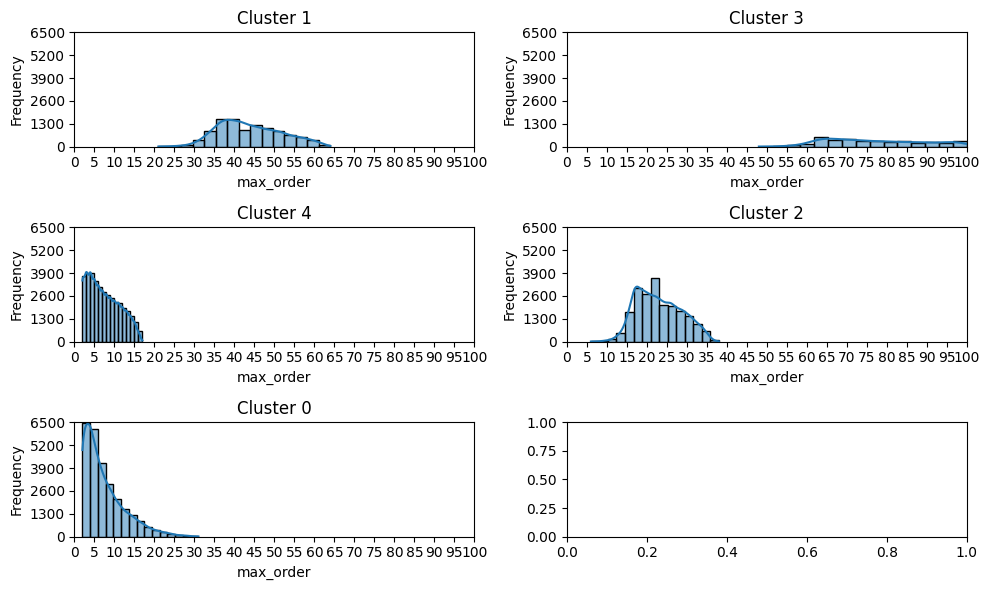

In [38]:
clusters = df_l5['Clusters_5'].unique()
n_clusters = len(clusters)

n_cols = 2
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 6))

max_freq = 0
for cluster in clusters:
    freq, _ = np.histogram(df_l5[df_l5['Clusters_5'] == cluster]['max_order'], bins=15)
    max_freq = max(max_freq, freq.max())

round_up_to_y = 100 
max_freq_rounded = math.ceil(max_freq / round_up_to_y) * round_up_to_y

min_x = df_l5['max_order'].min()
max_x = df_l5['max_order'].max()

round_up_to_x = 5
min_x_rounded = math.floor(min_x / round_up_to_x) * round_up_to_x
max_x_rounded = math.ceil(max_x / round_up_to_x) * round_up_to_x

for i, cluster in enumerate(clusters):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(
        df_l5[df_l5['Clusters_5'] == cluster]['max_order'],
        kde=True, bins=15, ax=axes[row, col]
    )
    axes[row, col].set_title(f'Cluster {cluster}')
    axes[row, col].set_xlabel('max_order')
    axes[row, col].set_ylabel('Frequency')
    
    axes[row, col].set_ylim(0, max_freq_rounded)
       
    axes[row, col].set_xlim(min_x_rounded, max_x_rounded)
      
    axes[row, col].yaxis.set_ticks(range(0, max_freq_rounded + 1, max_freq_rounded // 5))
        
    axes[row, col].xaxis.set_ticks(range(min_x_rounded, max_x_rounded + 1, round_up_to_x))

plt.tight_layout()
plt.show()


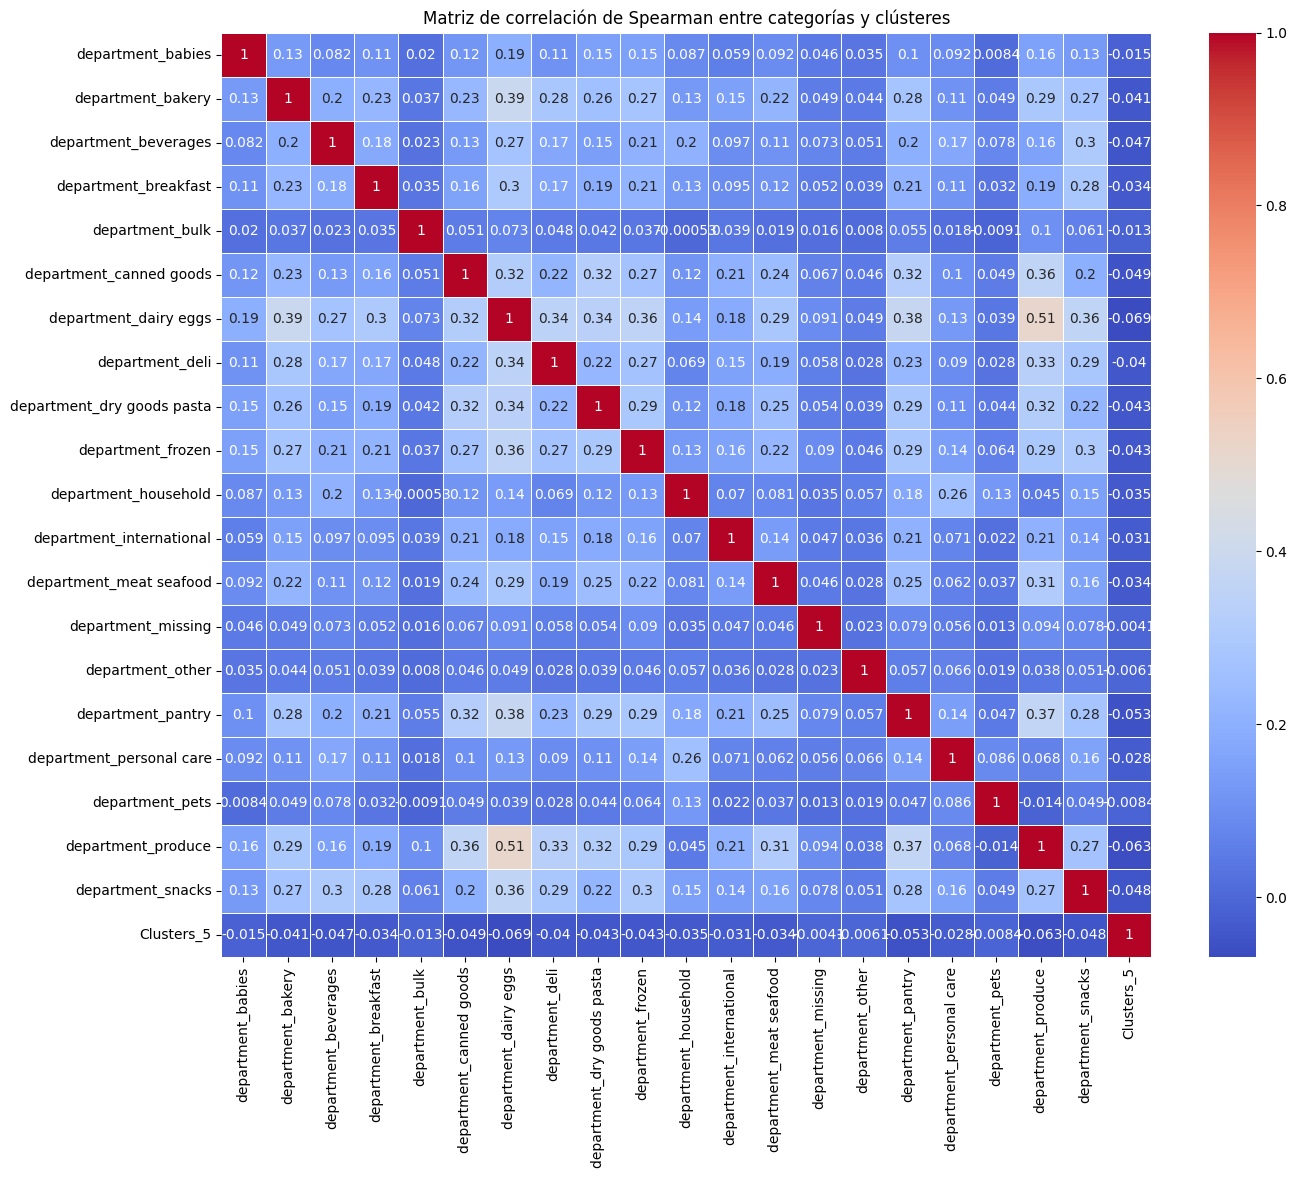

In [39]:
correlations = df_l5[department_columns + ['Clusters_5']].corr(method='spearman')

plt.figure(figsize=(15, 12))
sns.heatmap(correlations, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación de Spearman entre categorías y clústeres')
plt.show()

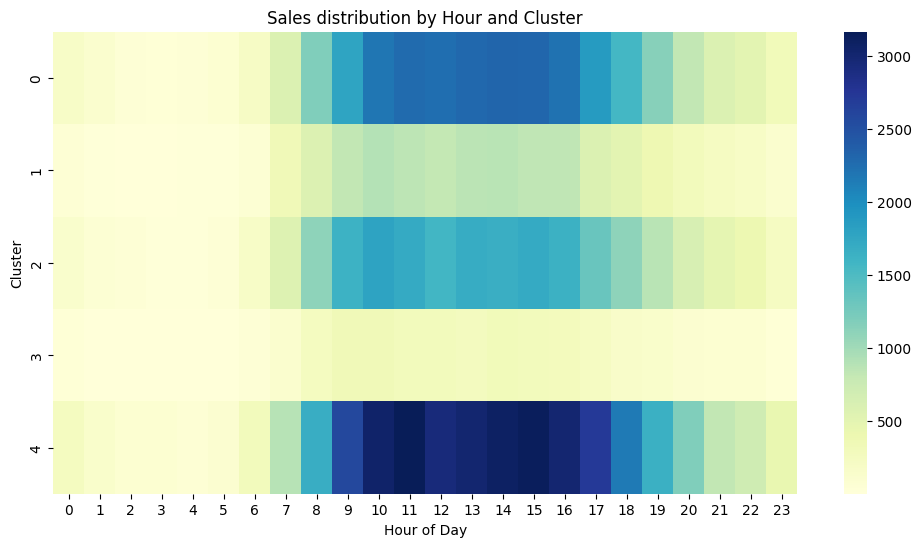

In [40]:
order_hour_counts = df_l5.groupby(['Clusters_5', 'order_hour_of_day']).size().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(order_hour_counts, cmap='YlGnBu', annot=False)
plt.title('Sales distribution by Hour and Cluster')
plt.xlabel('Hour of Day')
plt.ylabel('Cluster')
plt.show()

Si bien la clusterización utilizando 5 clusters muestra buenos resultados, se detecta que algunos clusters presentan caracteristicas muy similares entre si.

#### 1. **Separación Visual de Clusters (Gráfica PCA)**
   - Al igual que la clusterizacion con n=4, la gráfica de PCA se observa una clara separación entre los clusters, esto indica que los datos poseen patrones definidos diferenciados entre si.
   - Cada cluster ocupa una región distinta en el espacio reducido por PCA, esto sugiere que las características seleccionadas son buenas para la segmentación.

#### 2. **Distribución de Variables por Cluster**
   - Las distribuciones de variables como `days_since_prior_order` y `max_order` comienzan a tener comportamiento similar intracluster:
     - **`days_since_prior_order`:** Cluster 0 & Cluster 2 muestran comportamiento similar con picos aproximadamente a los 5 dias.
     - **`max_order`:**  Los Clusters 1 & 2 tienen tendencias similares en el rango de (20-30) maxima de ordenes, a diferencia de la clusterizacion con n=4. 


#### **Conclusión**
Dado que al agregar un nuevo cluster comenzamos a obtener claras similitudes entre ellos, se decide que al momento, es conveniente quedarse con la clusterizacion n=4

### Clustering - K-Means - n=5 with Input Reduction

In [41]:
X_red = df[['max_order', 'order_hour_of_day', 'days_since_prior_order', 'reordered']]

X_input = X_red.values

kmeans5_1 = KMeans(n_clusters=5, random_state=100)
kmeans5_1.fit(X_input)

predictions = kmeans5_1.predict(X_input)

counts = np.bincount(predictions, minlength=5).reshape(1, 5)

countscldf = pd.DataFrame(counts, columns=["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"])
print(countscldf)

   Cluster 0  Cluster 1  Cluster 2  Cluster 3  Cluster 4
0       9942      37973      27083      20273       3647


In [42]:
pca = PCA(n_components=2, random_state=453)
X_pca = pca.fit_transform(X_input)

print('Explained variance ratio (first two components):', pca.explained_variance_ratio_)

Explained variance ratio (first two components): [0.77659628 0.18112181]


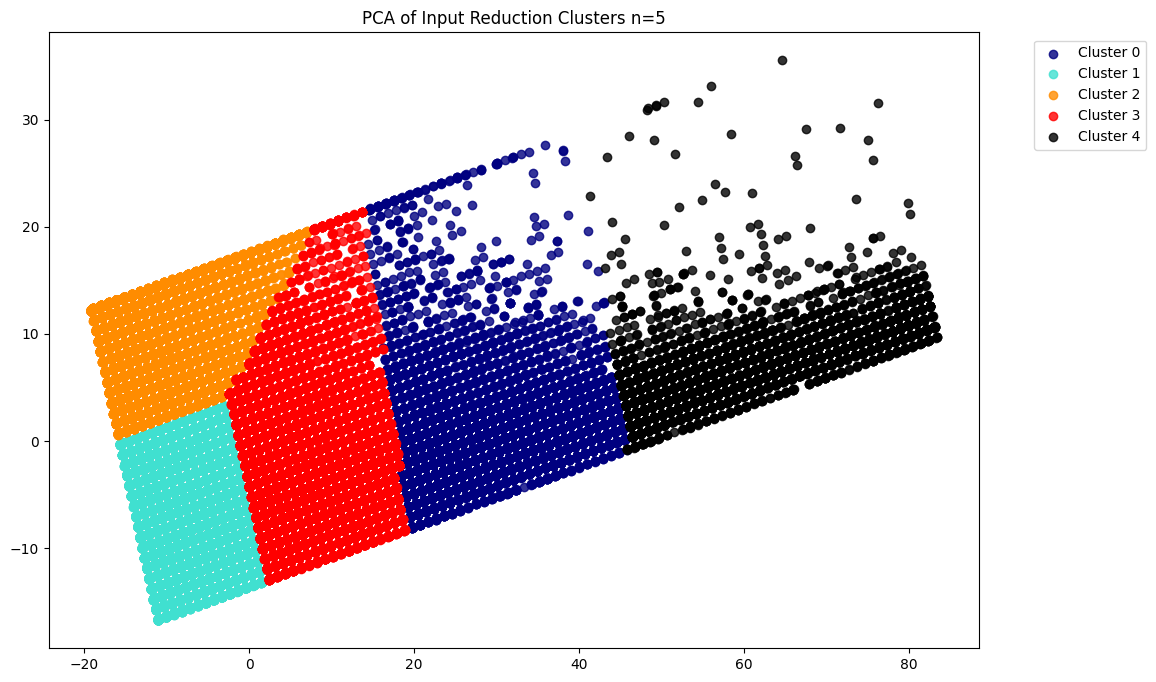

In [43]:
plt.figure(figsize=(12, 8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
target_names = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"]

for color, cluster_idx, target_name in zip(colors, range(5), target_names):
    plt.scatter(
        X_pca[predictions == cluster_idx, 0], 
        X_pca[predictions == cluster_idx, 1], 
        color=color, alpha=0.8, label=target_name
    )

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)
plt.title('PCA of Input Reduction Clusters n=5')
plt.show()

In [44]:
df['Clusters_5_1'] = kmeans5_1.labels_

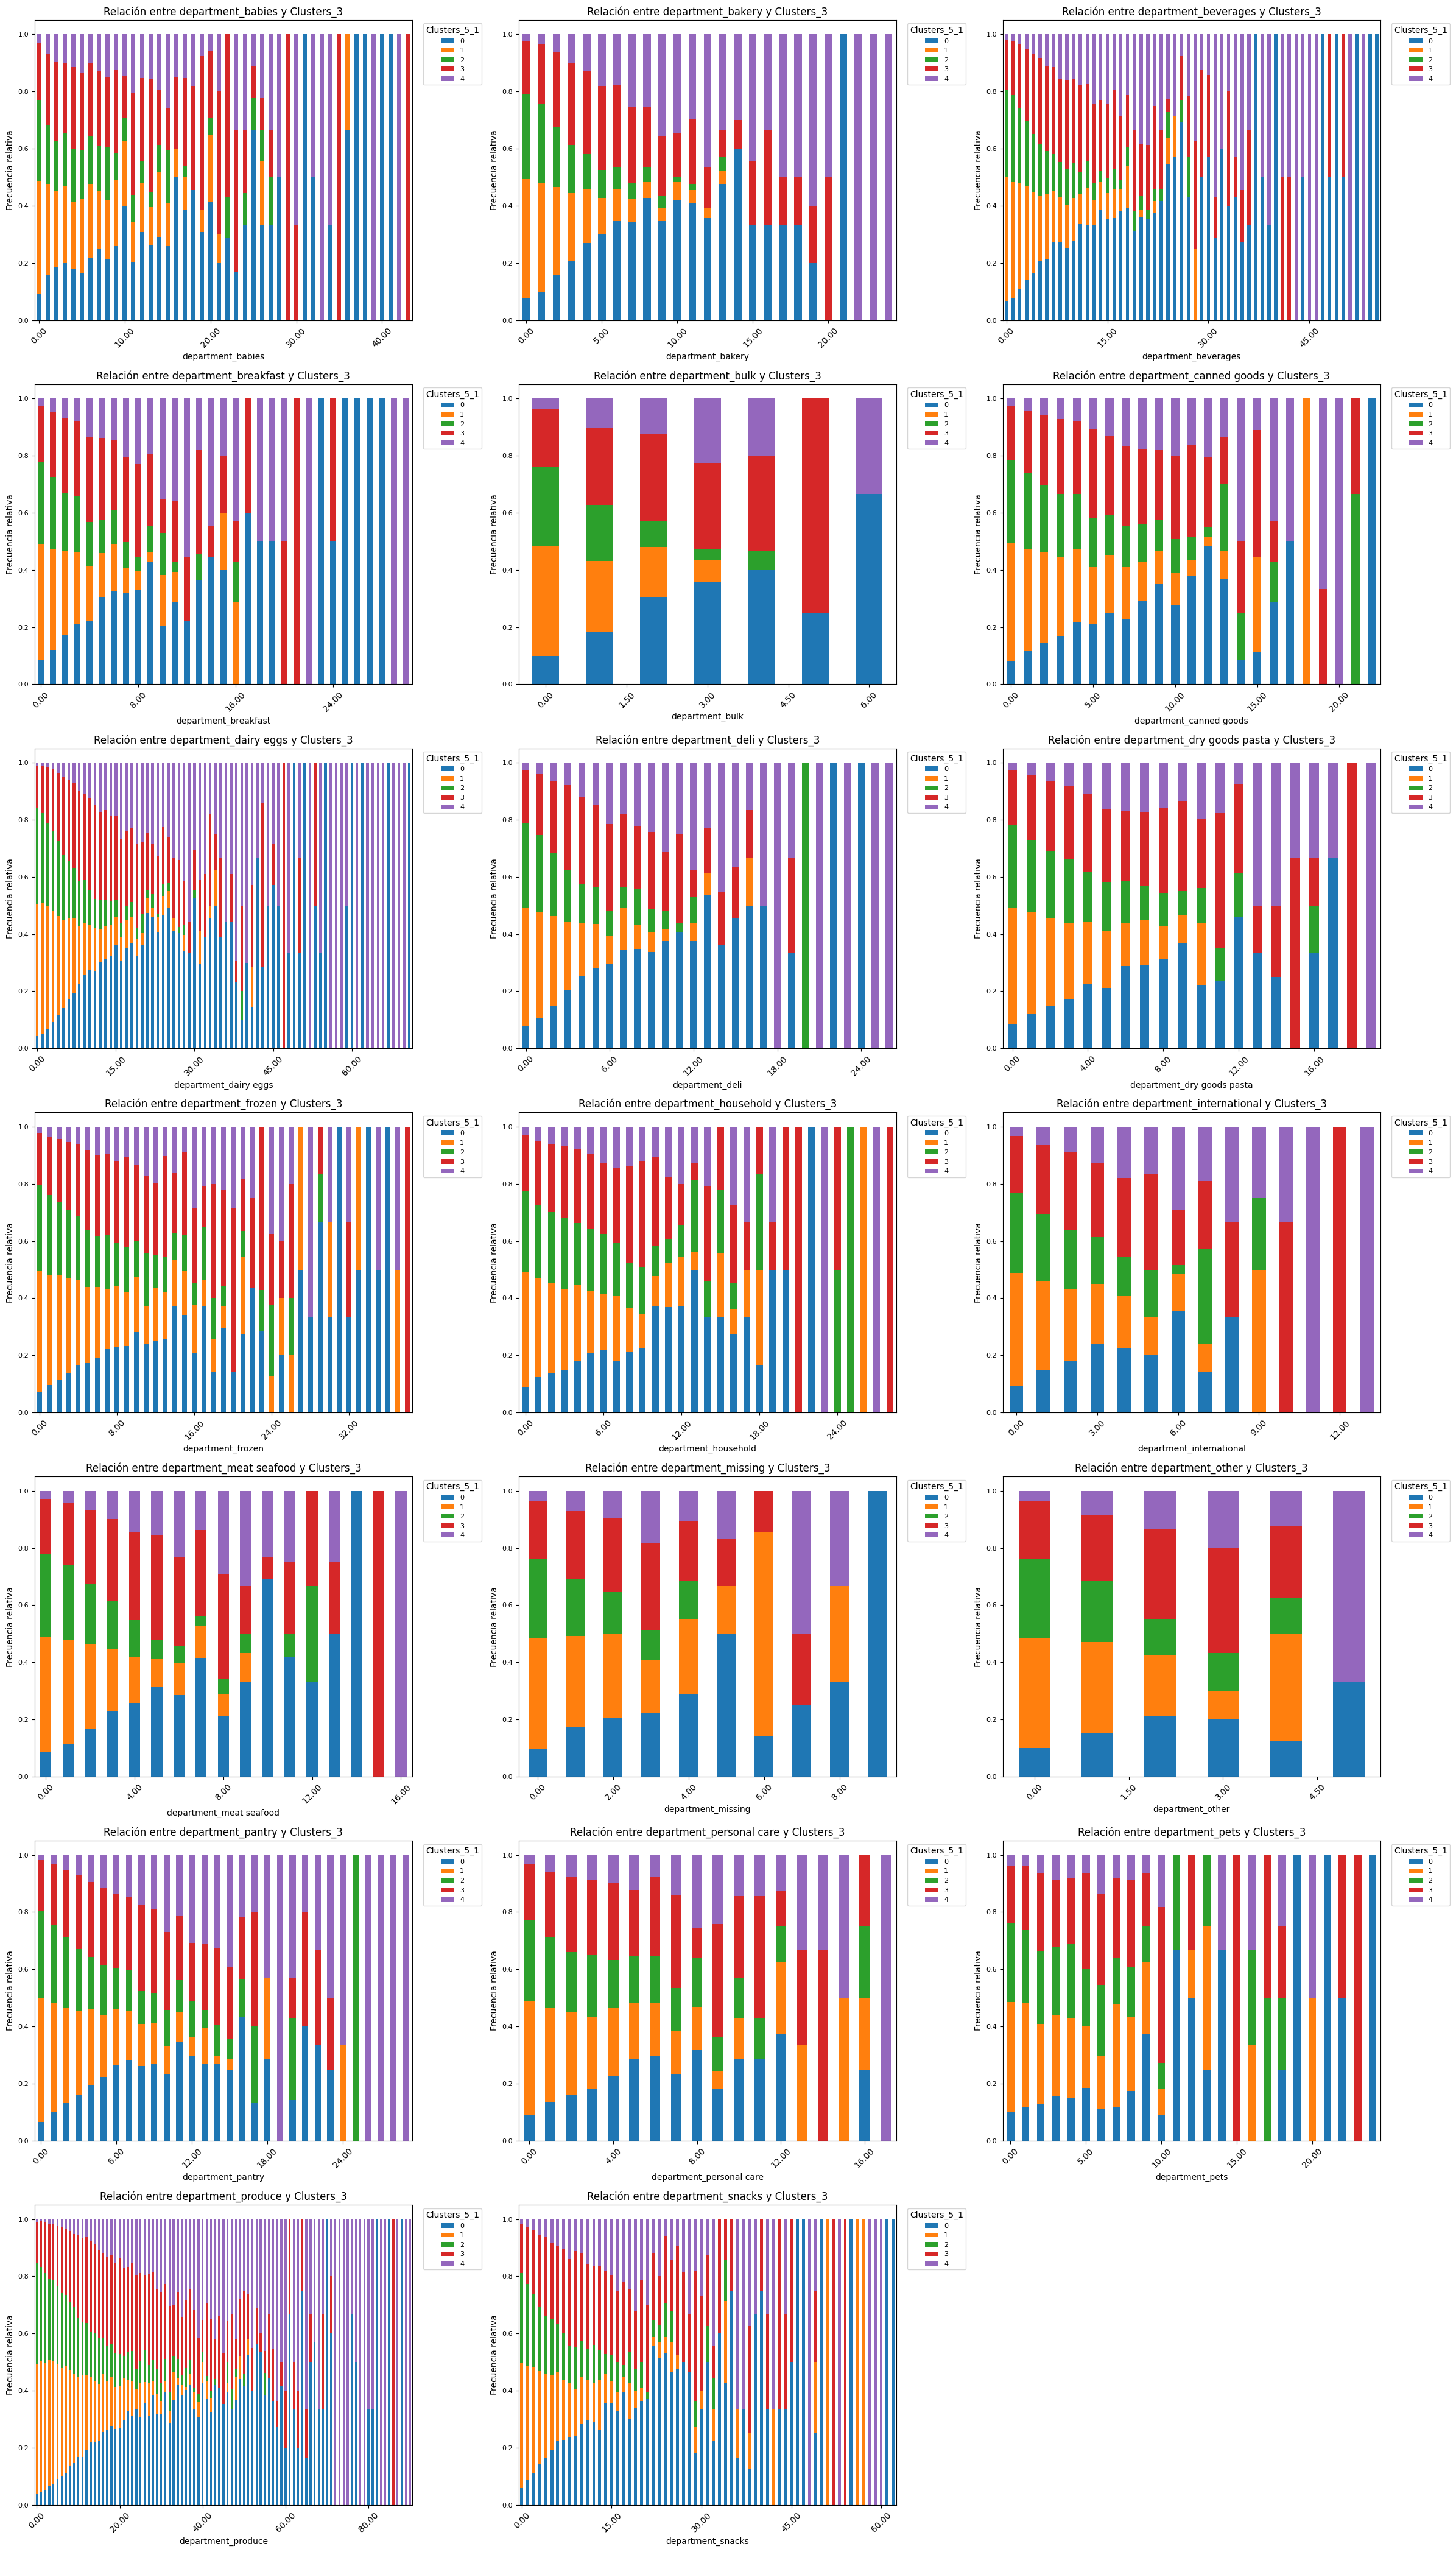

In [45]:
department_columns = [col for col in df.columns if col.startswith('department')]

num_rows = 7
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 6 * num_rows))

for i, columna in enumerate(department_columns):
    if i >= num_rows * num_cols:
        break
    
    row = i // num_cols
    col = i % num_cols

    frecuencias = df.groupby(columna)['Clusters_5_1'].value_counts(normalize=True).unstack()
    frecuencias.plot(kind='bar', stacked=True, ax=axs[row, col])
    
    axs[row, col].set_title(f'Relación entre {columna} y Clusters_3', fontsize=12)
    axs[row, col].set_xlabel(columna, fontsize=10)
    axs[row, col].set_ylabel('Frecuencia relativa', fontsize=10)
    axs[row, col].tick_params(axis='x', rotation=45, labelsize=10)
    axs[row, col].tick_params(axis='y', labelsize=8)

    axs[row, col].legend(title='Clusters_5_1', fontsize=8, bbox_to_anchor=(1.02, 1), loc='upper left')
    
    axs[row, col].xaxis.set_major_locator(ticker.MaxNLocator(5))
    axs[row, col].xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axs[j // num_cols, j % num_cols])

plt.tight_layout()
plt.show()

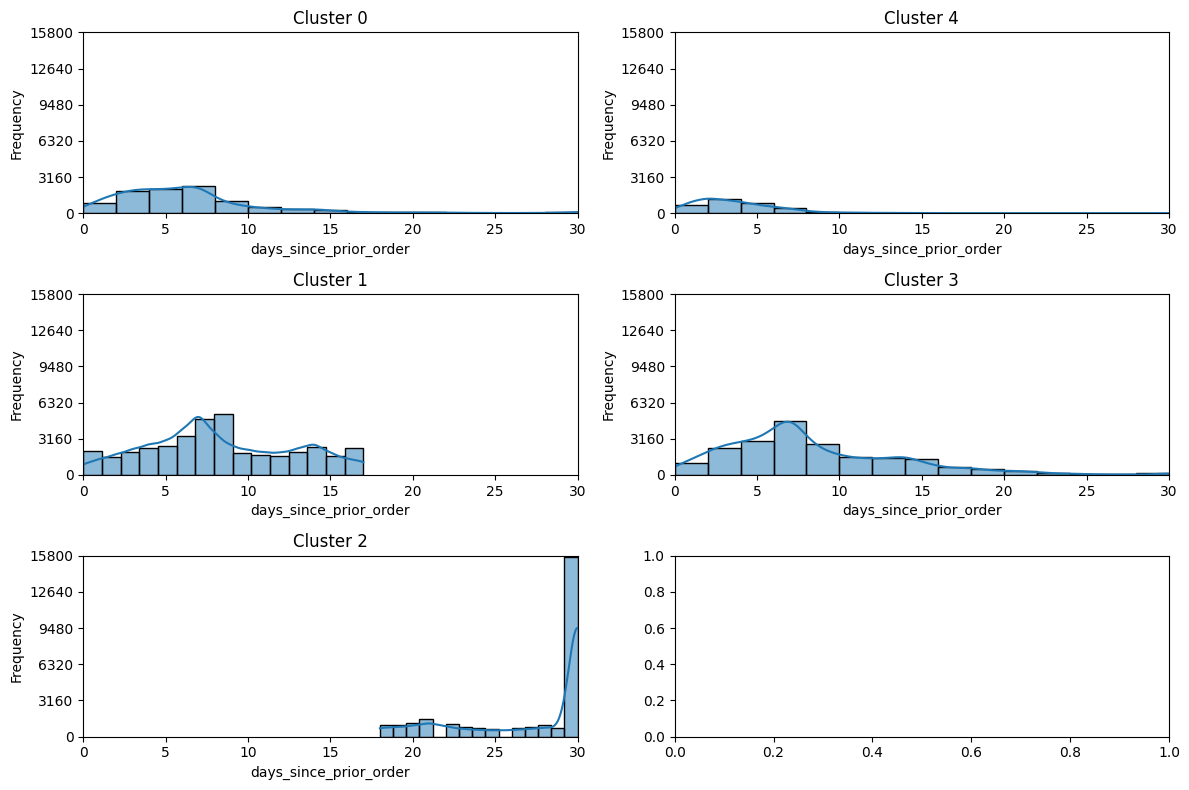

In [46]:
clusters = df['Clusters_5_1'].unique()
n_clusters = len(clusters)

n_cols = 2
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

max_freq = 0
for cluster in clusters:
    freq, _ = np.histogram(df[df['Clusters_5_1'] == cluster]['days_since_prior_order'], bins=15)
    max_freq = max(max_freq, freq.max())

round_up_to_y = 100 
max_freq_rounded = math.ceil(max_freq / round_up_to_y) * round_up_to_y

min_x = df['days_since_prior_order'].min()
max_x = df['days_since_prior_order'].max()

round_up_to_x = 5
min_x_rounded = math.floor(min_x / round_up_to_x) * round_up_to_x
max_x_rounded = math.ceil(max_x / round_up_to_x) * round_up_to_x

for i, cluster in enumerate(clusters):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(
        df[df['Clusters_5_1'] == cluster]['days_since_prior_order'],
        kde=True, bins=15, ax=axes[row, col]
    )
    axes[row, col].set_title(f'Cluster {cluster}')
    axes[row, col].set_xlabel('days_since_prior_order')
    axes[row, col].set_ylabel('Frequency')
    
    axes[row, col].set_ylim(0, max_freq_rounded)
       
    axes[row, col].set_xlim(min_x_rounded, max_x_rounded)
      
    axes[row, col].yaxis.set_ticks(range(0, max_freq_rounded + 1, max_freq_rounded // 5))
        
    axes[row, col].xaxis.set_ticks(range(min_x_rounded, max_x_rounded + 1, round_up_to_x))

plt.tight_layout()
plt.show()

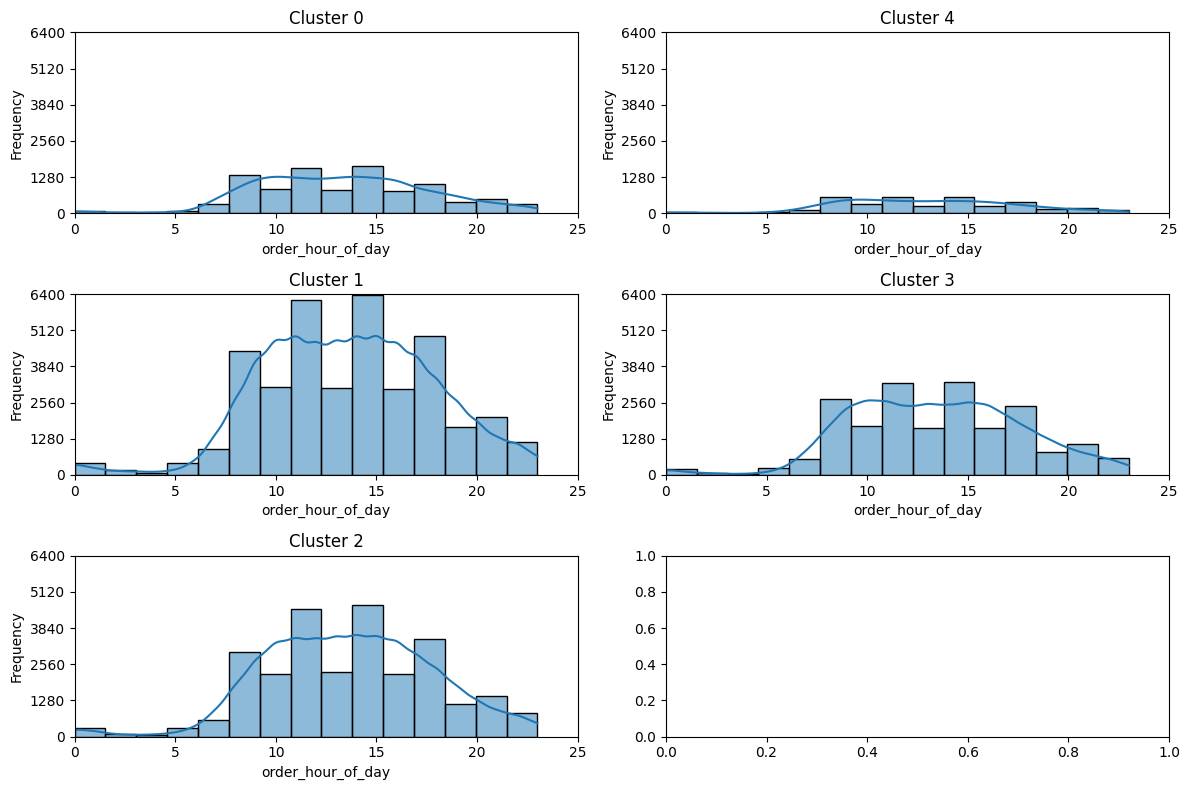

In [47]:
clusters = df['Clusters_5_1'].unique()
n_clusters = len(clusters)

n_cols = 2
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

max_freq = 0
for cluster in clusters:
    freq, _ = np.histogram(df[df['Clusters_5_1'] == cluster]['order_hour_of_day'], bins=15)
    max_freq = max(max_freq, freq.max())

round_up_to_y = 100 
max_freq_rounded = math.ceil(max_freq / round_up_to_y) * round_up_to_y

min_x = df['order_hour_of_day'].min()
max_x = df['order_hour_of_day'].max()

round_up_to_x = 5
min_x_rounded = math.floor(min_x / round_up_to_x) * round_up_to_x
max_x_rounded = math.ceil(max_x / round_up_to_x) * round_up_to_x

for i, cluster in enumerate(clusters):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(
        df[df['Clusters_5_1'] == cluster]['order_hour_of_day'],
        kde=True, bins=15, ax=axes[row, col]
    )
    axes[row, col].set_title(f'Cluster {cluster}')
    axes[row, col].set_xlabel('order_hour_of_day')
    axes[row, col].set_ylabel('Frequency')
    
    axes[row, col].set_ylim(0, max_freq_rounded)
       
    axes[row, col].set_xlim(min_x_rounded, max_x_rounded)
      
    axes[row, col].yaxis.set_ticks(range(0, max_freq_rounded + 1, max_freq_rounded // 5))
        
    axes[row, col].xaxis.set_ticks(range(min_x_rounded, max_x_rounded + 1, round_up_to_x))

plt.tight_layout()
plt.show()

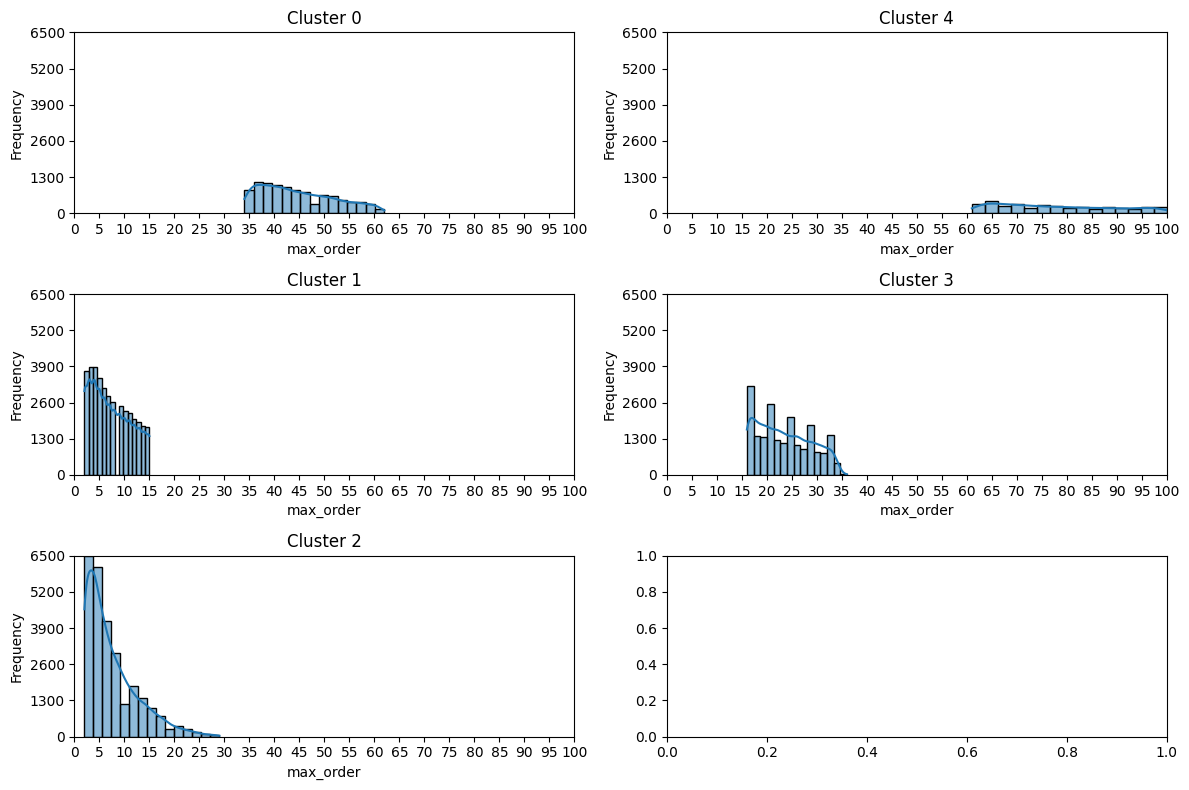

In [48]:
clusters = df['Clusters_5_1'].unique()
n_clusters = len(clusters)

n_cols = 2
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

max_freq = 0
for cluster in clusters:
    freq, _ = np.histogram(df[df['Clusters_5_1'] == cluster]['max_order'], bins=15)
    max_freq = max(max_freq, freq.max())

round_up_to_y = 100 
max_freq_rounded = math.ceil(max_freq / round_up_to_y) * round_up_to_y

min_x = df['max_order'].min()
max_x = df['max_order'].max()

round_up_to_x = 5
min_x_rounded = math.floor(min_x / round_up_to_x) * round_up_to_x
max_x_rounded = math.ceil(max_x / round_up_to_x) * round_up_to_x

for i, cluster in enumerate(clusters):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(
        df[df['Clusters_5_1'] == cluster]['max_order'],
        kde=True, bins=15, ax=axes[row, col]
    )
    axes[row, col].set_title(f'Cluster {cluster}')
    axes[row, col].set_xlabel('max_order')
    axes[row, col].set_ylabel('Frequency')
    
    axes[row, col].set_ylim(0, max_freq_rounded)
       
    axes[row, col].set_xlim(min_x_rounded, max_x_rounded)
      
    axes[row, col].yaxis.set_ticks(range(0, max_freq_rounded + 1, max_freq_rounded // 5))
        
    axes[row, col].xaxis.set_ticks(range(min_x_rounded, max_x_rounded + 1, round_up_to_x))

plt.tight_layout()
plt.show()

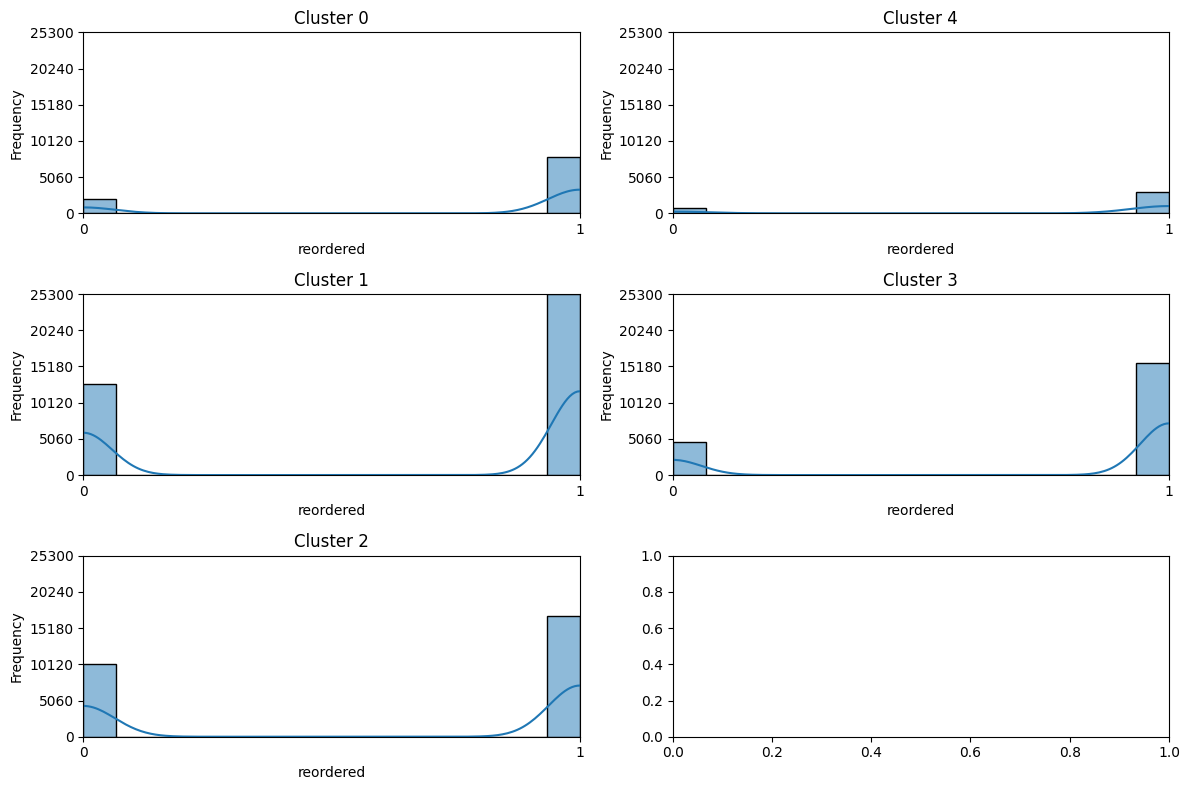

In [49]:
clusters = df['Clusters_5_1'].unique()
n_clusters = len(clusters)

n_cols = 2
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

max_freq = 0
for cluster in clusters:
    freq, _ = np.histogram(df[df['Clusters_5_1'] == cluster]['reordered'], bins=15)
    max_freq = max(max_freq, freq.max())

round_up_to_y = 100 
max_freq_rounded = math.ceil(max_freq / round_up_to_y) * round_up_to_y

min_x = df['reordered'].min()
max_x = df['reordered'].max()

round_up_to_x = 1
min_x_rounded = math.floor(min_x / round_up_to_x) * round_up_to_x
max_x_rounded = math.ceil(max_x / round_up_to_x) * round_up_to_x

for i, cluster in enumerate(clusters):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(
        df[df['Clusters_5_1'] == cluster]['reordered'],
        kde=True, bins=15, ax=axes[row, col]
    )
    axes[row, col].set_title(f'Cluster {cluster}')
    axes[row, col].set_xlabel('reordered')
    axes[row, col].set_ylabel('Frequency')
    
    axes[row, col].set_ylim(0, max_freq_rounded)
       
    axes[row, col].set_xlim(min_x_rounded, max_x_rounded)
      
    axes[row, col].yaxis.set_ticks(range(0, max_freq_rounded + 1, max_freq_rounded // 5))
        
    axes[row, col].xaxis.set_ticks(range(min_x_rounded, max_x_rounded + 1, round_up_to_x))

plt.tight_layout()
plt.show()

Se prueba una nueva clusterizacion con n=5 pero con input reduction, para ver si se puede obtener una clsuterizacion mejor que la de n=4
La nueva clusterizacion es sumamente similar a la de n=5 sin input reduction.

#### **Distribución de Variables por Cluster**
   - Las distribuciones de variables como `days_since_prior_order` y `max_order` muestran el mismo comportamiento que la clsuterizacion de n=5 sin input reduction, compartiendon las siguientes similitudes de clusters:
     - **`days_since_prior_order`:** Cluster 0 & Cluster 2 muestran comportamiento similar con picos aproximadamente a los 5 dias.
     - **`max_order`:**  Los Clusters 1 & 2 tienen tendencias similares en el rango de (20-30) maxima de ordenes, a diferencia de la clusterizacion con n=4. 
#### **Conclusión**
Dado que ambas clusterizaciones de n=5 comienzan a mostrar peores resultados que la clusterizacion de n=4, se decide utilizar la clusterizacion kmeans n=4.

#### **Generación de DataSet para modelo de recomendación**

In [50]:
df_recommendersystem = df_l4

In [51]:
cluster_mapping = {
    2: "Básicos Frecuentes",
    3: "Grandes Compras",
    1: "Diversificados",
    0: "Rutina Estable"
}

df_recommendersystem['Customer_Type'] = df_recommendersystem['Clusters_4'].map(cluster_mapping)

C:\Users\Matias\AppData\Local\Temp\ipykernel_27900\3856889198.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recommendersystem['Customer_Type'] = df_recommendersystem['Clusters_4'].map(cluster_mapping)


In [52]:
df_recommendersystem.head()

user_id  department_babies  department_bakery  department_beverages  \
0   147243                  0                  1                     1   
1   195275                  0                  3                     4   
2    58222                  0                  0                     1   
3   120094                  0                  0                     2   
4    53959                  2                  0                     3   

   department_breakfast  department_bulk  department_canned goods  \
0                     2                0                        2   
1                     0                0                        0   
2                     0                0                        0   
3                     0                0                        0   
4                     1                0                        0   

   department_dairy eggs  department_deli  department_dry goods pasta  ...  \
0                     31                7                           3  ...   
1                      6                1                           4  ...   
2                      6                0                           0  ...   
3                      1                0                           0  ...   
4                      4                0                           0  ...   

   department_pantry  department_personal care  department_pets  \
0                  4                         1                0   
1                  1                         0                0   
2                  4                         0                0   
3                  1                         0                0   
4                  0                         9                0   

   department_produce  department_snacks  max_order  order_hour_of_day  \
0                  18                  4         38                 16   
1                  24                  5         90                 11   
2                   3                  0          3                 11   
3                   3                  1         18                 17   
4                   5                  2          8                  1   

   days_since_prior_order  Clusters_4       Customer_Type  
0                     3.0           2  Básicos Frecuentes  
1                     3.0           0      Rutina Estable  
2                     6.0           1      Diversificados  
3                     7.0           1      Diversificados  
4                    30.0           3     Grandes Compras  

[5 rows x 26 columns]

In [53]:
df_recommendersystem.drop(columns='days_since_prior_order', inplace=True)

C:\Users\Matias\AppData\Local\Temp\ipykernel_27900\4079876858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recommendersystem.drop(columns='days_since_prior_order', inplace=True)


In [54]:
df_recommendersystem.drop(columns='order_hour_of_day', inplace=True)


C:\Users\Matias\AppData\Local\Temp\ipykernel_27900\4117228127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recommendersystem.drop(columns='order_hour_of_day', inplace=True)


In [55]:
df_recommendersystem.to_csv('../00_Data_Bases/df_recommendersystem.csv', index=False)

zip_filename = '../00_Data_Bases/df_recommendersystem.zip'
csv_filename = '../00_Data_Bases/df_recommendersystem.csv'

with zipfile.ZipFile(zip_filename, 'w', compression=zipfile.ZIP_DEFLATED) as zipf:
    zipf.write(csv_filename, arcname='df_recommendersystem.csv')